# Solution for question 1

In [2]:
!pip install opendatasets

In [3]:
import opendatasets as od


In [4]:
dataset = 'https://www.kaggle.com/datasets/rxsraghavagrawal/instagram-reach'

In [5]:
od.download(dataset)


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: supriyasingh1997
Your Kaggle Key: ········


100%|██████████████████████████████████████████████████████████████████████████████| 16.9k/16.9k [00:00<00:00, 646kB/s]

In [6]:
import os


In [7]:
data_dir = '.\instagram-reach'

In [8]:
os.listdir(data_dir)


['instagram_reach.csv']

In [9]:
import pandas as pd


In [10]:
df = pd.read_csv('instagram_reach.csv')

In [11]:
df.head(5)

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30


In [12]:
df.shape

(100, 8)

In [13]:
df.isnull().sum()

Unnamed: 0           0
S.No                 0
USERNAME             0
Caption              6
Followers            0
Hashtags             0
Time since posted    0
Likes                0
dtype: int64

In [14]:
df2 = df.copy()
df2.drop(['Unnamed: 0','S.No'], inplace=True,axis=1)

# Dealing with missing values

In [15]:
df2 = df2.dropna()

In [16]:
df2.shape

(94, 6)

In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94 entries, 0 to 99
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   USERNAME           94 non-null     object
 1   Caption            94 non-null     object
 2   Followers          94 non-null     int64 
 3   Hashtags           94 non-null     object
 4   Time since posted  94 non-null     object
 5   Likes              94 non-null     int64 
dtypes: int64(2), object(4)
memory usage: 5.1+ KB


In [18]:
#Times since posted will be better if in type of int/float, so it will be changed
Time_since_posted_in_hours=[]

for i in df2['Time since posted']:
    Time_since_posted_in_hours.append(i.replace('hours', ''))

df2.rename(columns={'USERNAME':'Username'}, inplace=True)
se = pd.Series(Time_since_posted_in_hours)
df2['Times since posted (hours)'] = se.values
df2['Times since posted (hours)'] = pd.to_numeric(df2['Times since posted (hours)'])
df2 = df2.drop('Time since posted', axis=1)

In [19]:
pip install wordcloud

  Using cached wordcloud-1.9.2-cp310-cp310-win_amd64.whl (152 kB)
Note: you may need to restart the kernel to use updated packages.


# Exploratory Data Analysis


In [20]:
import numpy as np
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
from numpy import absolute
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

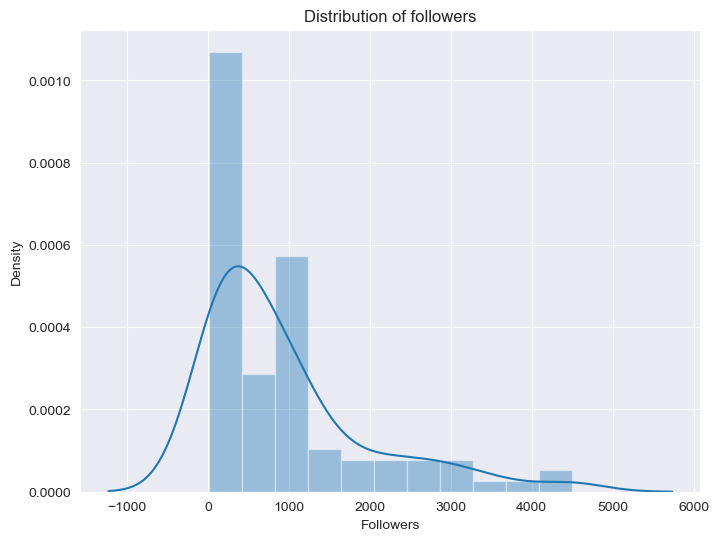

In [21]:
#Distribution of followers variable
plt.figure(figsize=(8, 6))
sns.distplot(df2['Followers'])
plt.title("Distribution of followers")
plt.show()

The followers distribution in right skewed. Most of the account has followers between 0-300 or more

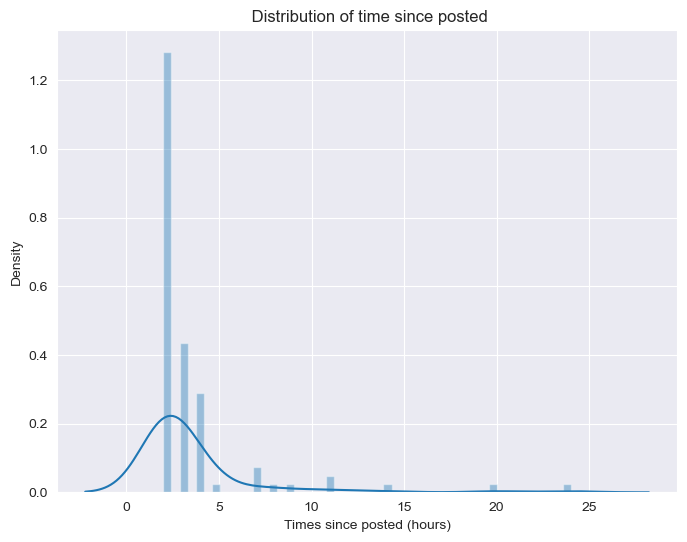

In [22]:
#Time_since_posted_in_hours variable

plt.figure(figsize=(8,6))
sns.distplot(df2['Times since posted (hours)'])
plt.title(' Distribution of time since posted')
plt.show()

The Time_since_posted_hours distribution is right skewed



In [23]:
print('There are', df2['Username'].nunique(), 'username')


There are 90 username


Out of 94 data, there are 90 unique users. That's quite a lot



1. Caption variables
In analyzing this variable, I will use wordcloud to know which words are mostly used in caption

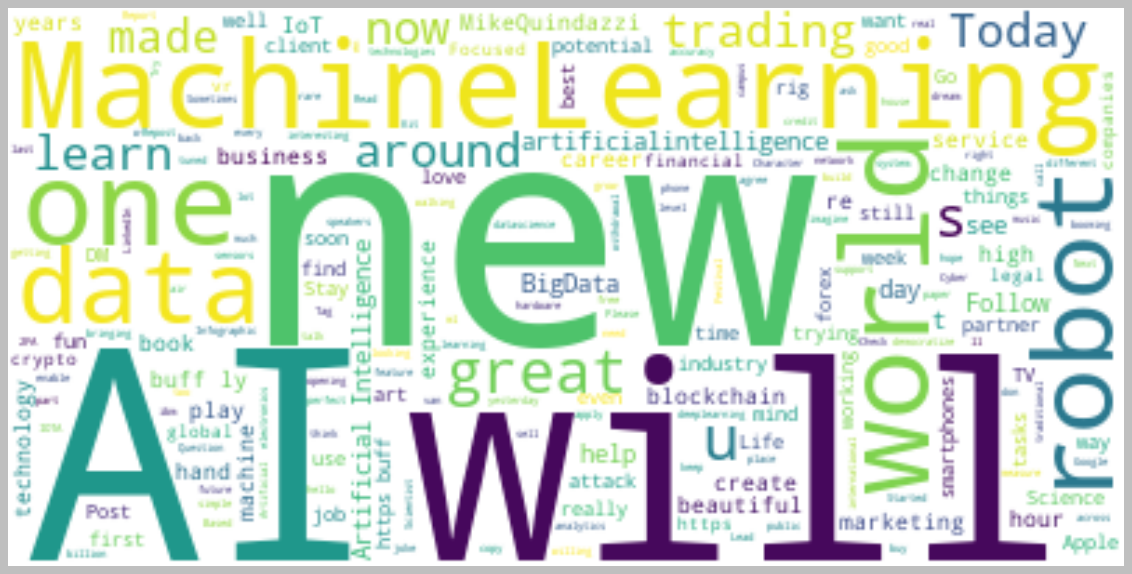

In [24]:
text = " ".join(i for i in df2.Caption)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.style.use('classic')
plt.figure( figsize=(18,16))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

From wordcloud above we know that words like 'AI', 'will', 'new' are the top three words on caption



1. Hastags variable
In analyzing this variable, I will use wordcloud to know which words are mostly used in hastag

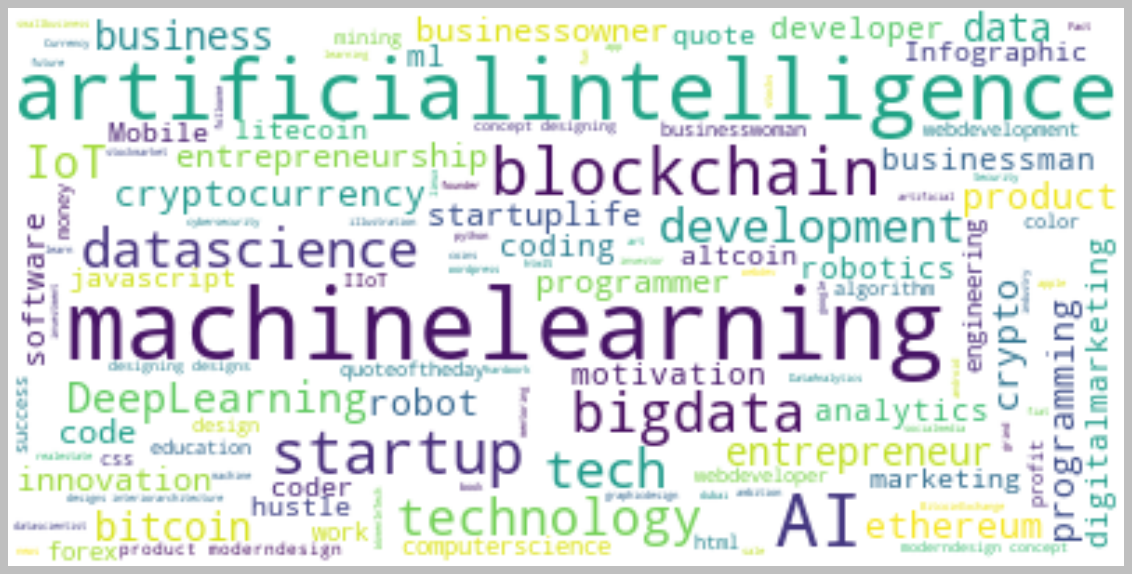

In [25]:
text = " ".join(i for i in df2.Hashtags)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.style.use('classic')
plt.figure( figsize=(18,16))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

From wordcloud above we know that words like 'artificialintelligence', 'machinelearning', 'AI' are the top three words on hashtags

Relationship between two variables
Times since posted in hours and likes
I will use scatterplot to visualize the relationship between these variables


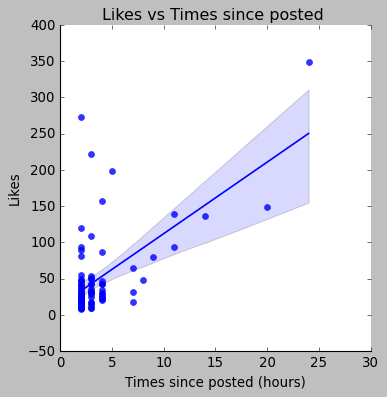

In [26]:
sns.lmplot(x='Times since posted (hours)', y='Likes', data=df2, fit_reg=True, scatter_kws={"marker": "D", "s": 30})

plt.title('Likes vs Times since posted ')
plt.xlabel('Times since posted (hours)')
plt.ylabel('Likes')
plt.show()

There is linear relationship between times since posted and likes. Some data shows no relationship between these two


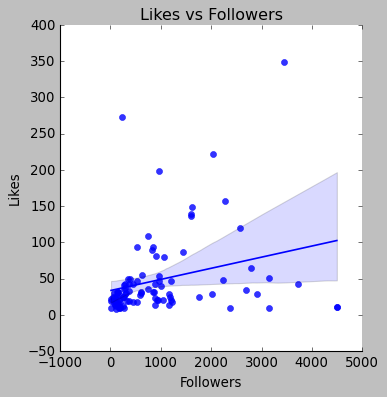

In [27]:
#Followers and likes
#I will use scatterplot to visualize the relationship between these variables


sns.lmplot(x='Followers', y='Likes', data=df2, fit_reg=True, scatter_kws={"marker": "D", "s": 30})

plt.title('Likes vs Followers')
plt.xlabel('Followers')
plt.ylabel('Likes')
plt.show()

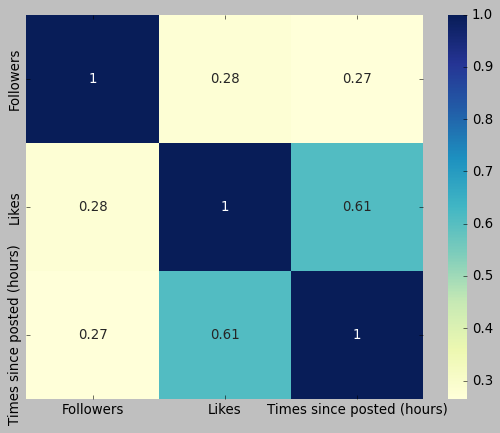

In [28]:
plt.figure(figsize=(8, 6))
sns.heatmap(df2.corr(), cmap="YlGnBu", annot=True)
plt.show()

There is strong correlation between likes and times since posted in hours



### Training the model

In [29]:
#Define x variables and y variable
x = df2[['Followers', 'Times since posted (hours)']]
y = df2['Likes']

#Split train set and test set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [32]:
y_pred = lr.predict(X_test)

In [33]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

print("MAE",mean_absolute_error(y_test,y_pred))
print("R2 score",r2_score(y_test,y_pred))

MAE 20.341529910256806
R2 score 0.545586646136722


# Solution for question 2

In [35]:
dataset1 = 'https://www.kaggle.com/datasets/ankurbajaj9/obesity-levels'

In [36]:
od.download(dataset1)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: supriyasingh1997
Your Kaggle Key: ········


100%|████████████████████████████████████████████████████████████████████████████████| 115k/115k [00:00<00:00, 246kB/s]

In [37]:
import os

In [46]:
data_dir1 = '.\obesity-levels'

In [47]:
os.listdir(data_dir1)


['ObesityDataSet_raw_and_data_sinthetic.arff',
 'ObesityDataSet_raw_and_data_sinthetic.csv']

In [23]:
df1 = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

In [24]:
df3 = df1.copy()
df3.head(10)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,Male,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,Male,24.0,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
9,Male,22.0,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight


In [25]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [26]:
df3.shape

(2111, 17)

We see no null values

In [27]:
df3['family_history_with_overweight'].value_counts()

yes    1726
no      385
Name: family_history_with_overweight, dtype: int64

In [28]:
df3['NObeyesdad'].value_counts()

Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: NObeyesdad, dtype: int64

In [29]:
df3['Weight'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2111 entries, 0 to 2110
Series name: Weight
Non-Null Count  Dtype  
--------------  -----  
2111 non-null   float64
dtypes: float64(1)
memory usage: 16.6 KB


C:\Users\supri\AppData\Local\Temp\ipykernel_20672\3401909805.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df3.corr(), cmap="YlGnBu", annot=True)


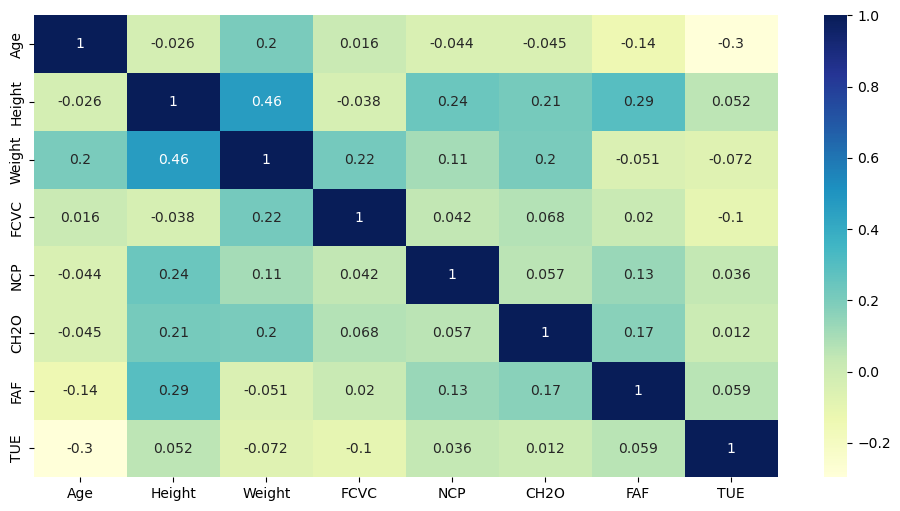

In [30]:
plt.figure(figsize=(12, 6))
sns.heatmap(df3.corr(), cmap="YlGnBu", annot=True)
plt.show()

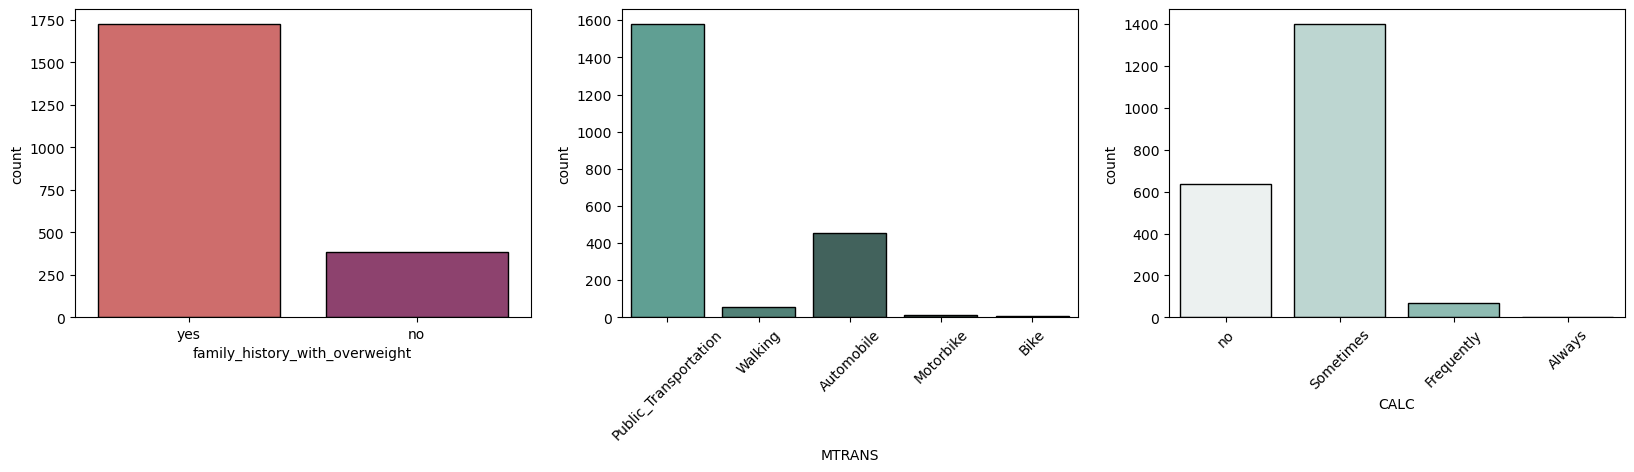

In [31]:
plt.figure(figsize=(20,4))
plt.subplot(131)
sns.countplot(x= 'family_history_with_overweight', data = df3, palette="flare",edgecolor="black")
plt.subplot(132)
sns.countplot(x= 'MTRANS', data = df3, palette="dark:#5A9_r",edgecolor="black")
plt.xticks(rotation=45)
plt.subplot(133)
sns.countplot(x= 'CALC', data = df3, palette="light:#5A9",edgecolor="black")
plt.xticks(rotation=45)
plt.show()

From this graph we analysed more than 1600 people were overweight in family history, less than 200 people prefer walking and almost 1600 people used public transport, also Sometime has high rang of 1400 in than anyother category in CALC

Here we see every category hardly differes from each other excepte Obesity_Type_I in NObeyesdad 

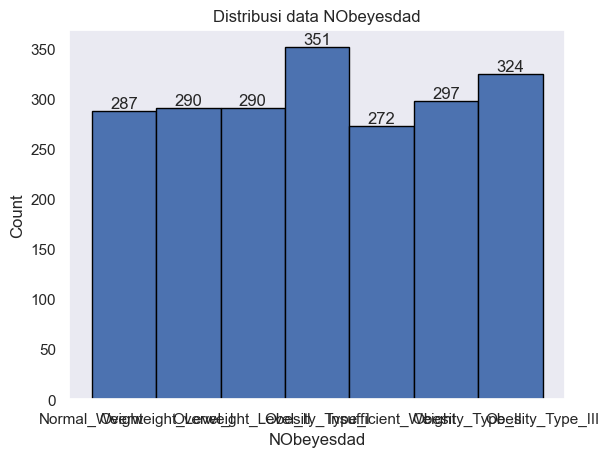

In [35]:
counts, edges, bars = plt.hist(df3['NObeyesdad'],edgecolor='black',bins=7)
plt.bar_label(bars)
plt.ylabel('Count')
plt.xlabel('NObeyesdad')
plt.title('Distribusi data NObeyesdad')
plt.grid()
plt.show()

In [36]:
# Split the dataset into features (X) and target (y)
X = df3.drop('NObeyesdad', axis=1)
y = df3['NObeyesdad']

In [37]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder


In [39]:
# Preprocess the dataset
encoder = LabelEncoder()
df3['Gender'] = encoder.fit_transform(df3['Gender'])
df3['family_history_with_overweight'] = encoder.fit_transform(df3['family_history_with_overweight'])
df3['FAVC'] = encoder.fit_transform(df3['FAVC'])
df3['CAEC'] = encoder.fit_transform(df3['CAEC'])
df3['SMOKE'] = encoder.fit_transform(df3['SMOKE'])
df3['SCC'] = encoder.fit_transform(df3['SCC'])
df3['CALC'] = encoder.fit_transform(df3['CALC'])
df3['MTRANS'] = encoder.fit_transform(df3['MTRANS'])
df3['NObeyesdad'] = encoder.fit_transform(df3['NObeyesdad'])

In [40]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   int32  
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   int32  
 5   FAVC                            2111 non-null   int32  
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   int32  
 9   SMOKE                           2111 non-null   int32  
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   int32  
 12  FAF                             21

In [41]:
# Split the dataset into features (X) and target (y)
X = df3.drop('NObeyesdad', axis=1)
y = df3['NObeyesdad']

In [42]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model Training using DecisionTreeRegressor

In [58]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score


rt = DecisionTreeRegressor(criterion = 'squared_error', max_depth=5)
rt.fit(X_train,y_train)
y_pred = rt.predict(X_test)
r2_score(y_test,y_pred)


0.6498567093672027

### Hyperparameter tuning

In [44]:
param_grid = {
    'max_depth':[2,4,8,10,None],
    'criterion':['squared_error','absolute_error'],
    'max_features':[0.25,0.5,1.0],
    'min_samples_split':[0.25,0.5,1.0]
}

In [45]:
from sklearn.model_selection import GridSearchCV

reg = GridSearchCV(DecisionTreeRegressor(),param_grid=param_grid)
reg.fit(X_train,y_train)


GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [2, 4, 8, 10, None],
                         'max_features': [0.25, 0.5, 1.0],
                         'min_samples_split': [0.25, 0.5, 1.0]})

In [46]:
reg.best_score_

0.5159349375801092

In [47]:
reg.best_params_

{'criterion': 'squared_error',
 'max_depth': 4,
 'max_features': 1.0,
 'min_samples_split': 0.25}

### Model Training using Logistic Regression

In [48]:
# Logistic Regression Classifier
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
y_pred= lr_clf.predict(X_test)

C:\Users\supri\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [49]:
print(accuracy_score(y_test,y_pred))

0.6548463356973995


In [50]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

### Model Training using RandomForestClassifier

In [51]:
rf = RandomForestClassifier(max_samples=0.75,random_state=42)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.9598108747044918

In [52]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(RandomForestClassifier(max_samples=0.75),X,y,cv=10,scoring='accuracy'))

0.9442032549405347

### Model Training using (SVM) Classifier

In [54]:
# Support Vector Machine (SVM) Classifier
svm_clf = SVC()
svm_clf.fit(X_train, y_train)
svm_predictions = svm_clf.predict(X_test)
print(accuracy_score(y_test, svm_predictions))


0.5650118203309693


# # Solution for question 4

In [59]:
dataset2 = 'https://www.kaggle.com/datasets/henrysue/online-shoppers-intention'

In [62]:
import opendatasets as od

od.download(dataset2)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: supriyasingh1997
Your Kaggle Key: ········


100%|███████████████████████████████████████████████████████████████████████████████| 252k/252k [00:00<00:00, 2.23MB/s]

In [63]:
import os

In [64]:
data_dir2 = '.\online-shoppers-intention'

In [65]:
os.listdir(data_dir2)


['online_shoppers_intention.csv']

In [6]:
data = pd.read_csv('online_shoppers_intention.csv')


NameError: name 'pd' is not defined

In [7]:
data1 = data.copy()
data1.tail()

NameError: name 'data' is not defined

In [4]:
data1.shape

NameError: name 'data1' is not defined

In [5]:
data1['VisitorType'].value_counts()

NameError: name 'data1' is not defined

In [151]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [152]:
data1.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

No null value present

In [153]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [154]:
# Numerical & Categorical columns
num_cols = [x for x in data1.select_dtypes(include=np.number)]    # to extract numerical columns
cat_cols = [x for x in data1.select_dtypes(exclude=np.number)]       # to extract Categorical columns
print("There are", len(num_cols), "numerical columns and", len(cat_cols), "categorical columns in the dataset\n")
print("Numerical columns:", num_cols)
print('------'*20)
print("Categorical columns:", cat_cols)

There are 14 numerical columns and 4 categorical columns in the dataset

Numerical columns: ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'OperatingSystems', 'Browser', 'Region', 'TrafficType']
------------------------------------------------------------------------------------------------------------------------
Categorical columns: ['Month', 'VisitorType', 'Weekend', 'Revenue']


<Axes: xlabel='Month'>

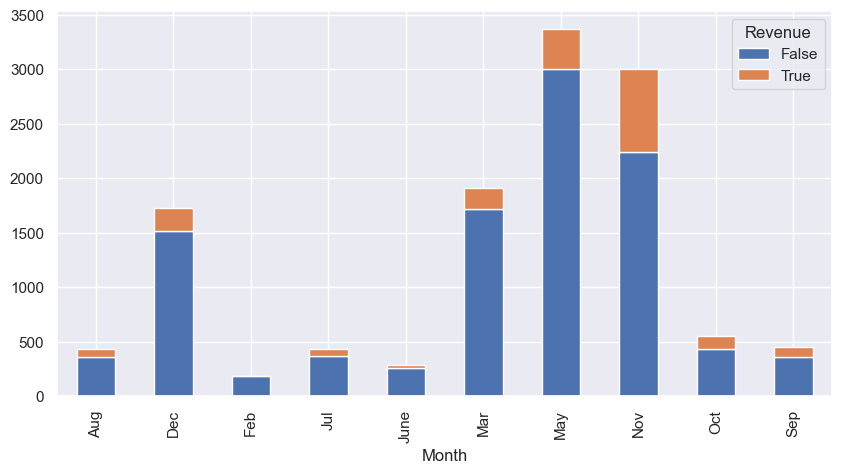

In [155]:
data1.groupby('Month')['Revenue'].value_counts().unstack('Revenue').plot(kind='bar', stacked=True, figsize=(10, 5))

Here we analize revenue is more for Nov month and less for Feb month

<Axes: xlabel='Weekend'>

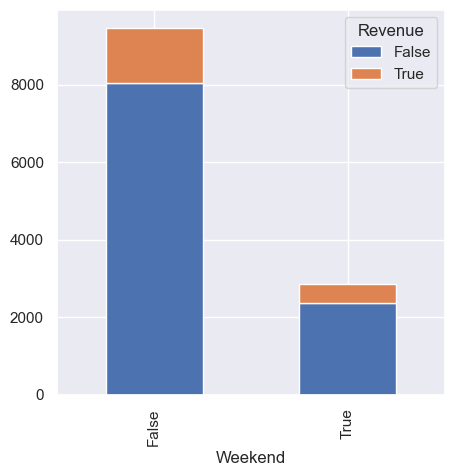

In [158]:
data1.groupby('Weekend')['Revenue'].value_counts().unstack('Revenue').plot(kind='bar', stacked=True, figsize=(5, 5))

Here Revenue generated if less in weekend


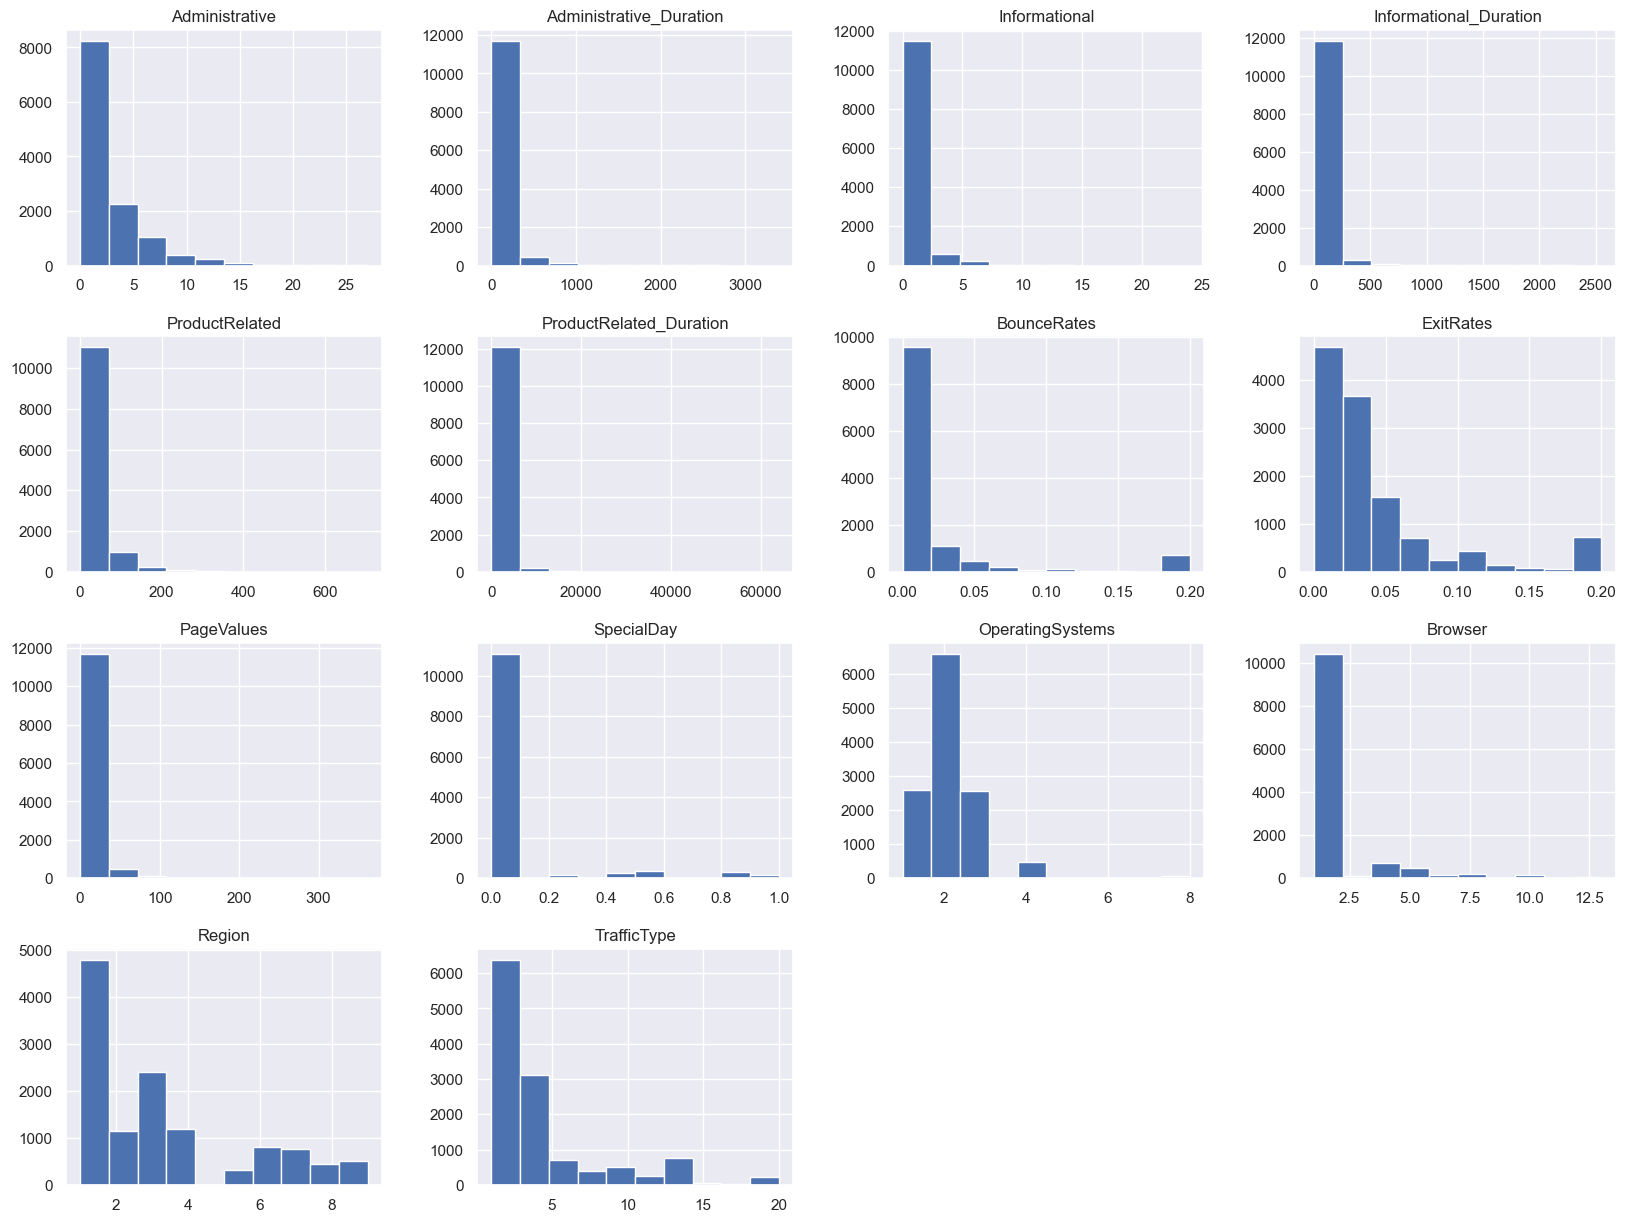

In [159]:
data1.hist(bins=10, figsize=(20,15))
plt.show()

In [160]:
data1

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


Now we will convert column Weekend and Revenue into binary where Yes is 1 and No is 0, 
Also will convert Month and Visitor Type features from categorical to numerical

In [1]:
Month={'Feb':2, 'Mar':3, 'May':5, 'Oct':10, 'June':6, 'Jul':7, 'Aug':8, 'Nov':11, 'Sep':9,'Dec':12}
data1['Month']=data1['Month'].map(Month)

VisitorType={'Returning_Visitor':3, 'New_Visitor':2, 'Other':1}
data1['VisitorType']=data1['VisitorType'].map(VisitorType)
d={True:1,False:0}
data1['Weekend']=data1['Weekend'].map(d)
data1['Revenue']=data1['Revenue'].map(d)

NameError: name 'data1' is not defined

In [2]:
Var_Corr = data1.corr()
fig, ax = plt.subplots(figsize=(15,12))  
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)

NameError: name 'data1' is not defined

By applying the .map() method with the d function, each value in the 'Weekend' column will be passed through d and replaced with the resulting value. 

In [169]:
data1

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2,1,1,1,1,3,0,0
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,2,2,2,1,2,3,0,0
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2,4,1,9,3,3,0,0
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,2,3,2,2,4,3,0,0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,2,3,3,1,4,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,12,4,6,1,1,3,1,0
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,11,3,2,1,8,3,1,0
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,11,3,2,1,13,3,1,0
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,11,2,2,3,11,3,0,0


In [173]:
from sklearn.preprocessing import StandardScaler 
  
scaler = StandardScaler() 
  
scaler.fit(data1.drop('Revenue', axis = 1)) 
scaled_features = scaler.transform(data1.drop('Revenue', axis = 1)) 
  
df_feat = pd.DataFrame(scaled_features, columns = data1.columns[:-1]) 
df_feat.head() 

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,-1.665924,-1.233426,-0.790293,-0.894178,-0.762629,0.401025,-0.550552
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.590903,-0.457683,1.171473,-0.317178,-0.308821,-1.665924,-0.136078,-0.207952,-0.894178,-0.514182,0.401025,-0.550552
2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,-1.665924,2.058618,-0.790293,2.437081,-0.265735,0.401025,-0.550552
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.622954,0.573535,1.994610,-0.317178,-0.308821,-1.665924,0.961270,-0.207952,-0.477771,-0.017289,0.401025,-0.550552
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.296430,-0.045196,0.142551,-0.317178,-0.308821,-1.665924,0.961270,0.374389,-0.894178,-0.017289,0.401025,1.816360


Here we perform feature scaling using the StandardScaler to standardize the numerical features in df, excluding the 'Revenue' column, and stores the scaled features in the df_feat DataFrame.

We don't have much correlation.


### K Nearest Neighbore


In [189]:
from sklearn.model_selection import train_test_split 
  
X_train, X_test, y_train, y_test = train_test_split( 
      scaled_features, data1['Revenue'], test_size = 0.30) 
  
from sklearn.neighbors import KNeighborsClassifier 
  
knn = KNeighborsClassifier(n_neighbors = 17) 
  
knn.fit(X_train, y_train) 
y_pred = knn.predict(X_test) 
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred)) 

0.8851040821843742
              precision    recall  f1-score   support

           0       0.89      0.98      0.94      3138
           1       0.79      0.33      0.47       561

    accuracy                           0.89      3699
   macro avg       0.84      0.66      0.70      3699
weighted avg       0.88      0.89      0.86      3699



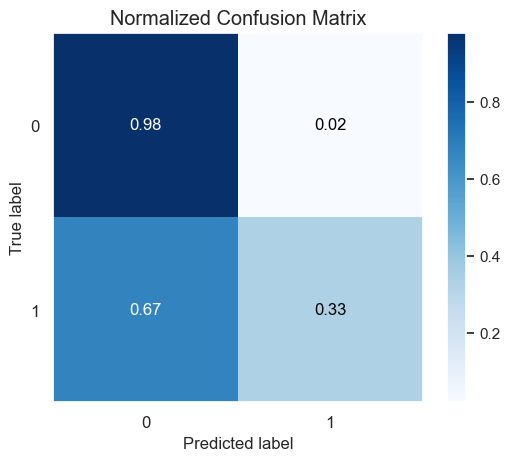

In [182]:
import scikitplot as skplt


from sklearn.metrics import classification_report, confusion_matrix 
plt_2 = skplt.metrics.plot_confusion_matrix(y_test,y_pred, normalize=True)

### We found that TP is good but FN is also high value, we need to correct that.
We can increase value of recall.


In [180]:
!pip install scikit-plot


In [197]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve
y_pred1 = (knn.predict_proba(X_test)[:,1] >= 0.15).astype(int) # set threshold as 0.3
print(recall_score(y_test, y_pred1))
print(classification_report(y_test, y_pred1)) 

0.7522281639928698
              precision    recall  f1-score   support

           0       0.95      0.78      0.85      3138
           1       0.38      0.75      0.50       561

    accuracy                           0.77      3699
   macro avg       0.66      0.76      0.68      3699
weighted avg       0.86      0.77      0.80      3699



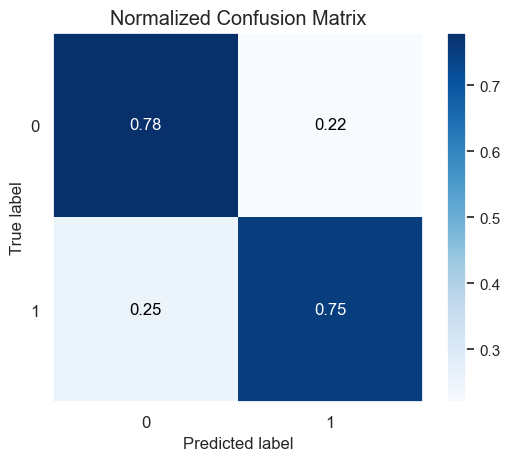

In [195]:
plt_2 = skplt.metrics.plot_confusion_matrix(y_test,y_pred1, normalize=True)

# Solution for question 5

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

        
import sklearn
import matplotlib.pyplot as plt
import seaborn as sb

In [4]:
dataset3 = 'https://www.kaggle.com/datasets/brllrb/uber-and-lyft-dataset-boston-ma'

In [5]:
import opendatasets as od

od.download(dataset3)

Skipping, found downloaded files in ".\uber-and-lyft-dataset-boston-ma" (use force=True to force download)


In [6]:
import os

In [7]:
data_dir3 = '.\\uber-and-lyft-dataset-boston-ma'

In [67]:
os.listdir(data_dir3)

['.ipynb_checkpoints']

In [9]:
data4 = pd.read_csv('rideshare_kaggle.csv')

In [10]:
data4.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [11]:
data4.shape


(693071, 57)

In [12]:
data4.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [13]:
data4 = data4.drop(['id','timestamp','datetime','long_summary','apparentTemperatureHighTime','apparentTemperatureLowTime',
                  'apparentTemperatureLowTime','windGustTime','sunriseTime','sunsetTime','uvIndexTime','temperatureMinTime',
                 'temperatureMaxTime','apparentTemperatureMinTime','temperatureLowTime','apparentTemperatureMaxTime'
                 ,'latitude','longitude'],axis = 1)

In [14]:
data4.shape

(693071, 40)

Checking the correlation between Price and Temperature related features



In [15]:
data_new = data4[['price','temperature','apparentTemperature','temperatureHigh','temperatureLow','apparentTemperatureHigh',
                'apparentTemperatureLow','temperatureMin','temperatureHighTime','temperatureMax','apparentTemperatureMin','apparentTemperatureMax']]
data_new.head()

,price,temperature,apparentTemperature,temperatureHigh,temperatureLow,apparentTemperatureHigh,apparentTemperatureLow,temperatureMin,temperatureHighTime,temperatureMax,apparentTemperatureMin,apparentTemperatureMax
0,5.0,42.34,37.12,43.68,34.19,37.95,27.39,39.89,1544968800,43.68,33.73,38.07
1,11.0,43.58,37.35,47.30,42.10,43.92,36.20,40.49,1543251600,47.30,36.20,43.92
2,7.0,38.33,32.93,47.55,33.10,44.12,29.11,35.36,1543320000,47.55,31.04,44.12
3,26.0,34.38,29.63,45.03,28.90,38.53,26.20,34.67,1543510800,45.03,30.30,38.53
4,9.0,37.44,30.88,42.18,36.71,35.75,30.29,33.10,1543420800,42.18,29.11,35.75


In [16]:
data_new.shape

(693071, 12)

<Axes: >

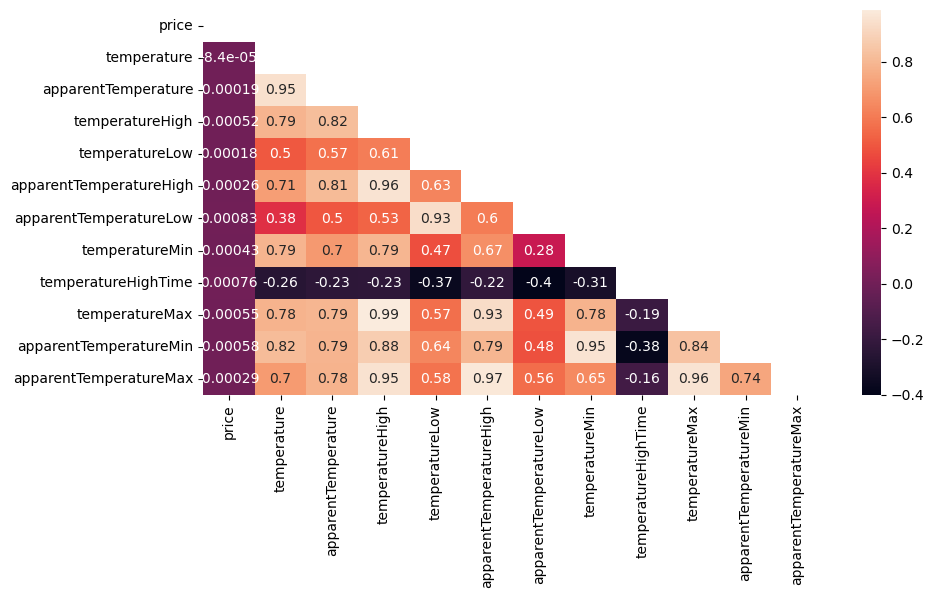

In [17]:
#plotting heatmap with correlation on data_new dataframe
plt.figure(figsize=(10,5))
sb.heatmap(data_new.corr(),annot=True, mask=np.triu(data_new.corr()))

Removing all the temperature related features from the dataframe as they have very weak correlation with the predictand(price)



In [18]:
data_new = data4[['temperature','apparentTemperature','temperatureHigh','temperatureLow','apparentTemperatureHigh',
                'apparentTemperatureLow','temperatureMin','temperatureHighTime','temperatureMax','apparentTemperatureMin','apparentTemperatureMax']]

data = data4.drop(data_new.columns,axis=1)
data.head()

,hour,day,month,timezone,source,destination,cab_type,product_id,name,price,...,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,moonPhase,precipIntensityMax
0,9,16,12,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,...,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,0.30,0.1276
1,2,27,11,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,...,rain,41.83,1003.97,90,1.00,0,4.786,291.1,0.64,0.1300
2,1,28,11,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,...,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,0.68,0.1064
3,4,30,11,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,...,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,0.75,0.0000
4,3,29,11,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,...,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,0.72,0.0001


Analyzing data in the categorical features



In [19]:
cat_col = data.select_dtypes(include=['object','category']).columns.tolist()
data_new = data[cat_col]
data_new.head()

,timezone,source,destination,cab_type,product_id,name,short_summary,icon
0,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,Mostly Cloudy,partly-cloudy-night
1,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,Rain,rain
2,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,Clear,clear-night
3,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,Clear,clear-night
4,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,Partly Cloudy,partly-cloudy-night


Checking for unique values in all categorical columns



In [20]:
for col in data_new:
    print(f'{col} : {data_new[col].unique()}')
    print()
    

timezone : ['America/New_York']

source : ['Haymarket Square' 'Back Bay' 'North End' 'North Station' 'Beacon Hill'
 'Boston University' 'Fenway' 'South Station' 'Theatre District'
 'West End' 'Financial District' 'Northeastern University']

destination : ['North Station' 'Northeastern University' 'West End' 'Haymarket Square'
 'South Station' 'Fenway' 'Theatre District' 'Beacon Hill' 'Back Bay'
 'North End' 'Financial District' 'Boston University']

cab_type : ['Lyft' 'Uber']

product_id : ['lyft_line' 'lyft_premier' 'lyft' 'lyft_luxsuv' 'lyft_plus' 'lyft_lux'
 '6f72dfc5-27f1-42e8-84db-ccc7a75f6969'
 '6c84fd89-3f11-4782-9b50-97c468b19529'
 '55c66225-fbe7-4fd5-9072-eab1ece5e23e'
 '9a0e7b09-b92b-4c41-9779-2ad22b4d779d'
 '6d318bcc-22a3-4af6-bddd-b409bfce1546'
 '997acbb5-e102-41e1-b155-9df7de0a73f2'
 '8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a']

name : ['Shared' 'Lux' 'Lyft' 'Lux Black XL' 'Lyft XL' 'Lux Black' 'UberXL'
 'Black' 'UberX' 'WAV' 'Black SUV' 'UberPool' 'Taxi']

short_summary : [' M

In [21]:
data_new['product_id'].value_counts()

6f72dfc5-27f1-42e8-84db-ccc7a75f6969    55096
9a0e7b09-b92b-4c41-9779-2ad22b4d779d    55096
6d318bcc-22a3-4af6-bddd-b409bfce1546    55096
6c84fd89-3f11-4782-9b50-97c468b19529    55095
8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a    55095
55c66225-fbe7-4fd5-9072-eab1ece5e23e    55094
997acbb5-e102-41e1-b155-9df7de0a73f2    55091
lyft_premier                            51235
lyft                                    51235
lyft_luxsuv                             51235
lyft_plus                               51235
lyft_lux                                51235
lyft_line                               51233
Name: product_id, dtype: int64

Removing timezone column as it has only value across all the observations and productid as it has more than 50% of the values with junk data



In [22]:
data = data.drop(['product_id','timezone'],axis=1)
data.head()

,hour,day,month,source,destination,cab_type,name,price,distance,surge_multiplier,...,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,moonPhase,precipIntensityMax
0,9,16,12,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0,...,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,0.30,0.1276
1,2,27,11,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0,...,rain,41.83,1003.97,90,1.00,0,4.786,291.1,0.64,0.1300
2,1,28,11,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0,...,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,0.68,0.1064
3,4,30,11,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0,...,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,0.75,0.0000
4,3,29,11,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0,...,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,0.72,0.0001


Analyzing features with numeric data types



In [23]:
num_col = data.select_dtypes(include=['int64','float64']).columns.tolist()
data_new = data[num_col]
data_new.columns

Index(['hour', 'day', 'month', 'price', 'distance', 'surge_multiplier',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'visibility', 'dewPoint', 'pressure', 'windBearing',
       'cloudCover', 'uvIndex', 'visibility.1', 'ozone', 'moonPhase',
       'precipIntensityMax'],
      dtype='object')

Analyzing climate related features with price column



In [24]:
cli_col = ['price','precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'visibility', 'dewPoint', 'pressure', 'windBearing',
       'cloudCover', 'uvIndex', 'visibility.1', 'ozone', 'moonPhase',
       'precipIntensityMax']
data_new = data[cli_col]
data_new.head()

,price,precipIntensity,precipProbability,humidity,windSpeed,windGust,visibility,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,moonPhase,precipIntensityMax
0,5.0,0.0000,0.0,0.68,8.66,9.17,10.000,32.70,1021.98,57,0.72,0,10.000,303.8,0.30,0.1276
1,11.0,0.1299,1.0,0.94,11.98,11.98,4.786,41.83,1003.97,90,1.00,0,4.786,291.1,0.64,0.1300
2,7.0,0.0000,0.0,0.75,7.33,7.33,10.000,31.10,992.28,240,0.03,0,10.000,315.7,0.68,0.1064
3,26.0,0.0000,0.0,0.73,5.28,5.28,10.000,26.64,1013.73,310,0.00,0,10.000,291.1,0.75,0.0000
4,9.0,0.0000,0.0,0.70,9.14,9.14,10.000,28.61,998.36,303,0.44,0,10.000,347.7,0.72,0.0001


<Axes: >

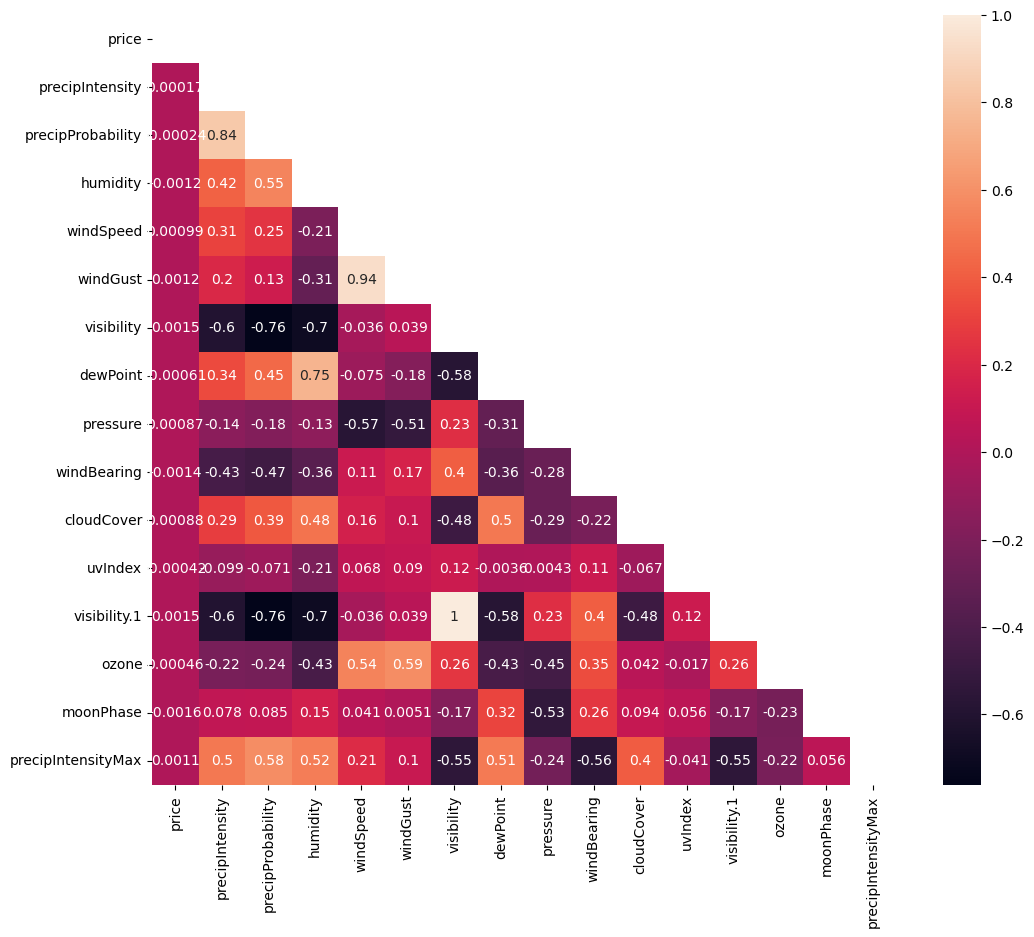

In [25]:
#plotting heatmap with correlation on data_new dataframe
plt.figure(figsize=(12,10))
sb.heatmap(data_new.corr(),annot=True, mask=np.triu(data_new.corr()))

All the climate related features has correlation almost 0 with respect to price column. Dropping these columns does'nt effect the accurracy prediction of price



In [26]:
cli_col = ['precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'visibility', 'dewPoint', 'pressure', 'windBearing',
       'cloudCover', 'uvIndex', 'visibility.1', 'ozone', 'moonPhase',
       'precipIntensityMax']
data = data.drop(cli_col,axis=1)
data.head()

,hour,day,month,source,destination,cab_type,name,price,distance,surge_multiplier,short_summary,icon
0,9,16,12,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0,Mostly Cloudy,partly-cloudy-night
1,2,27,11,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0,Rain,rain
2,1,28,11,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0,Clear,clear-night
3,4,30,11,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0,Clear,clear-night
4,3,29,11,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0,Partly Cloudy,partly-cloudy-night


In [27]:
data.shape


(693071, 12)

In [28]:
pip install -U scikit-learn


Note: you may need to restart the kernel to use updated packages.


Encoding all the category columns with the Onehot Encoder



In [29]:
from sklearn.preprocessing import OneHotEncoder
cat_col = data.select_dtypes(include=['object','category']).columns.tolist()
print(cat_col)

#intiate OneHotEncoder and concatinating original df with encoded column df's
for col in cat_col:
    encoder = OneHotEncoder(handle_unknown='ignore')
    enc_df = pd.DataFrame(encoder.fit_transform(data[[col]]).toarray())
    enc_df.columns = encoder.get_feature_names_out([col])
    data = data.drop(col, axis=1)
    data = pd.concat([data, enc_df], axis=1)

['source', 'destination', 'cab_type', 'name', 'short_summary', 'icon']


In [30]:
data.columns


Index(['hour', 'day', 'month', 'price', 'distance', 'surge_multiplier',
       'source_Back Bay', 'source_Beacon Hill', 'source_Boston University',
       'source_Fenway', 'source_Financial District', 'source_Haymarket Square',
       'source_North End', 'source_North Station',
       'source_Northeastern University', 'source_South Station',
       'source_Theatre District', 'source_West End', 'destination_Back Bay',
       'destination_Beacon Hill', 'destination_Boston University',
       'destination_Fenway', 'destination_Financial District',
       'destination_Haymarket Square', 'destination_North End',
       'destination_North Station', 'destination_Northeastern University',
       'destination_South Station', 'destination_Theatre District',
       'destination_West End', 'cab_type_Lyft', 'cab_type_Uber', 'name_Black',
       'name_Black SUV', 'name_Lux', 'name_Lux Black', 'name_Lux Black XL',
       'name_Lyft', 'name_Lyft XL', 'name_Shared', 'name_Taxi',
       'name_UberPool',

In [31]:
data.head()


,hour,day,month,price,distance,surge_multiplier,source_Back Bay,source_Beacon Hill,source_Boston University,source_Fenway,...,short_summary_ Partly Cloudy,short_summary_ Possible Drizzle,short_summary_ Rain,icon_ clear-day,icon_ clear-night,icon_ cloudy,icon_ fog,icon_ partly-cloudy-day,icon_ partly-cloudy-night,icon_ rain
0,9,16,12,5.0,0.44,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,27,11,11.0,0.44,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,28,11,7.0,0.44,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,4,30,11,26.0,0.44,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,3,29,11,9.0,0.44,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Analyzing source column values with price



In [32]:
src_col = ['price','source_Back Bay', 'source_Beacon Hill', 'source_Boston University',
       'source_Fenway', 'source_Financial District', 'source_Haymarket Square',
       'source_North End', 'source_North Station',
       'source_Northeastern University', 'source_South Station',
       'source_Theatre District', 'source_West End', 'destination_Back Bay']
data_new = data[src_col]
data_new.head()

,price,source_Back Bay,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,source_Haymarket Square,source_North End,source_North Station,source_Northeastern University,source_South Station,source_Theatre District,source_West End,destination_Back Bay
0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,11.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,26.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<Axes: >

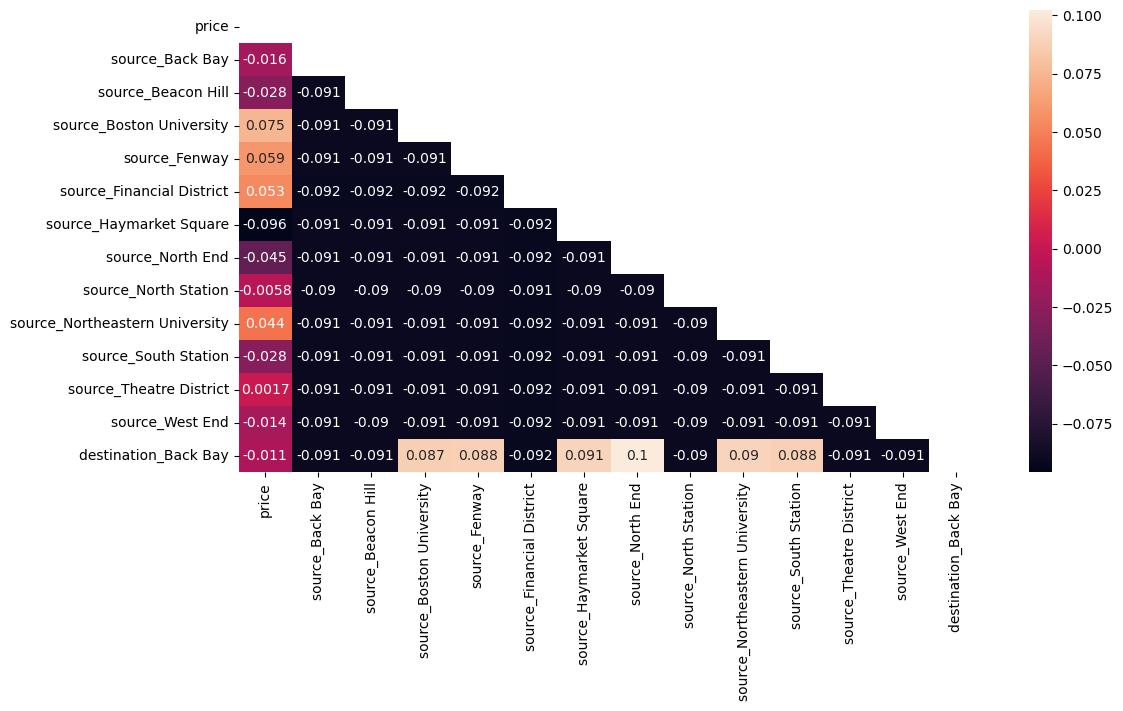

In [33]:
#plotting heatmap with correlation on data_new dataframe
plt.figure(figsize=(12,6))
sb.heatmap(data_new.corr(),annot=True, mask=np.triu(data_new.corr()))

Even source does'nt have any significant impact on the price. Similarly checking the same for destination column



In [34]:
dst_col = ['price','destination_Back Bay',
       'destination_Beacon Hill', 'destination_Boston University',
       'destination_Fenway', 'destination_Financial District',
       'destination_Haymarket Square', 'destination_North End',
       'destination_North Station', 'destination_Northeastern University',
       'destination_South Station', 'destination_Theatre District',
       'destination_West End']
data_new = data[src_col]
data_new.head()

,price,source_Back Bay,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,source_Haymarket Square,source_North End,source_North Station,source_Northeastern University,source_South Station,source_Theatre District,source_West End,destination_Back Bay
0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,11.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,26.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
cols = ['source_Back Bay', 'source_Beacon Hill', 'source_Boston University',
       'source_Fenway', 'source_Financial District', 'source_Haymarket Square',
       'source_North End', 'source_North Station',
       'source_Northeastern University', 'source_South Station',
       'source_Theatre District', 'source_West End', 'destination_Back Bay','destination_Back Bay',
       'destination_Beacon Hill', 'destination_Boston University',
       'destination_Fenway', 'destination_Financial District',
       'destination_Haymarket Square', 'destination_North End',
       'destination_North Station', 'destination_Northeastern University',
       'destination_South Station', 'destination_Theatre District',
       'destination_West End']
data = data.drop(cols,axis=1)
print(data.shape)
data.head()

(693071, 37)


,hour,day,month,price,distance,surge_multiplier,cab_type_Lyft,cab_type_Uber,name_Black,name_Black SUV,...,short_summary_ Partly Cloudy,short_summary_ Possible Drizzle,short_summary_ Rain,icon_ clear-day,icon_ clear-night,icon_ cloudy,icon_ fog,icon_ partly-cloudy-day,icon_ partly-cloudy-night,icon_ rain
0,9,16,12,5.0,0.44,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,27,11,11.0,0.44,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,28,11,7.0,0.44,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,4,30,11,26.0,0.44,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,3,29,11,9.0,0.44,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [36]:
summ_cols = ['price','short_summary_ Drizzle ', 'short_summary_ Foggy ',
       'short_summary_ Light Rain ', 'short_summary_ Mostly Cloudy ',
       'short_summary_ Overcast ', 'short_summary_ Partly Cloudy ',
       'short_summary_ Possible Drizzle ', 'short_summary_ Rain ','short_summary_ Clear ']
data_new = data[summ_cols]
data_new.head()

,price,short_summary_ Drizzle,short_summary_ Foggy,short_summary_ Light Rain,short_summary_ Mostly Cloudy,short_summary_ Overcast,short_summary_ Partly Cloudy,short_summary_ Possible Drizzle,short_summary_ Rain,short_summary_ Clear
0,5.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,9.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [37]:
summ_cols = ['short_summary_ Drizzle ', 'short_summary_ Foggy ',
       'short_summary_ Light Rain ', 'short_summary_ Mostly Cloudy ',
       'short_summary_ Overcast ', 'short_summary_ Partly Cloudy ',
       'short_summary_ Possible Drizzle ', 'short_summary_ Rain ','short_summary_ Clear ']
data = data.drop(summ_cols,axis=1)
print(data.shape)
data.head()

(693071, 28)


,hour,day,month,price,distance,surge_multiplier,cab_type_Lyft,cab_type_Uber,name_Black,name_Black SUV,...,name_UberX,name_UberXL,name_WAV,icon_ clear-day,icon_ clear-night,icon_ cloudy,icon_ fog,icon_ partly-cloudy-day,icon_ partly-cloudy-night,icon_ rain
0,9,16,12,5.0,0.44,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,27,11,11.0,0.44,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,28,11,7.0,0.44,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,4,30,11,26.0,0.44,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,3,29,11,9.0,0.44,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [38]:
ico_cols = ['price','icon_ clear-day ', 'icon_ clear-night ', 'icon_ cloudy ', 'icon_ fog ',
       'icon_ partly-cloudy-day ', 'icon_ partly-cloudy-night ',
       'icon_ rain ']
data_new = data[ico_cols]
data_new.head()

,price,icon_ clear-day,icon_ clear-night,icon_ cloudy,icon_ fog,icon_ partly-cloudy-day,icon_ partly-cloudy-night,icon_ rain
0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,11.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,26.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,9.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [39]:
nme_cols = ['price','name_Black', 'name_Black SUV',
       'name_Lux', 'name_Lux Black', 'name_Lux Black XL', 'name_Lyft',
       'name_Lyft XL', 'name_Shared', 'name_Taxi', 'name_UberPool',
       'name_UberX', 'name_UberXL', 'name_WAV']
data_new = data[nme_cols]
data_new.head()

,price,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_Taxi,name_UberPool,name_UberX,name_UberXL,name_WAV
0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,11.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,26.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
ico_cols = ['icon_ clear-day ', 'icon_ clear-night ', 'icon_ cloudy ', 'icon_ fog ',
       'icon_ partly-cloudy-day ', 'icon_ partly-cloudy-night ',
       'icon_ rain ']
data = data.drop(ico_cols,axis=1)
print(data.shape)
data.head()

(693071, 21)


,hour,day,month,price,distance,surge_multiplier,cab_type_Lyft,cab_type_Uber,name_Black,name_Black SUV,...,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_Taxi,name_UberPool,name_UberX,name_UberXL,name_WAV
0,9,16,12,5.0,0.44,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2,27,11,11.0,0.44,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,28,11,7.0,0.44,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,30,11,26.0,0.44,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3,29,11,9.0,0.44,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
nme_cols = ['price','name_Black', 'name_Black SUV',
       'name_Lux', 'name_Lux Black', 'name_Lux Black XL', 'name_Lyft',
       'name_Lyft XL', 'name_Shared', 'name_Taxi', 'name_UberPool',
       'name_UberX', 'name_UberXL', 'name_WAV']
data_new = data[nme_cols]
data_new.head()

,price,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_Taxi,name_UberPool,name_UberX,name_UberXL,name_WAV
0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,11.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,26.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
rem_cols =['price','hour', 'day', 'month', 'distance', 'surge_multiplier','cab_type_Lyft','cab_type_Uber']
data_new = data[rem_cols]
data_new.head()

,price,hour,day,month,distance,surge_multiplier,cab_type_Lyft,cab_type_Uber
0,5.0,9,16,12,0.44,1.0,1.0,0.0
1,11.0,2,27,11,0.44,1.0,1.0,0.0
2,7.0,1,28,11,0.44,1.0,1.0,0.0
3,26.0,4,30,11,0.44,1.0,1.0,0.0
4,9.0,3,29,11,0.44,1.0,1.0,0.0


In [43]:
data = data.drop(['month','day','hour','cab_type_Lyft','cab_type_Uber'],axis=1)
print(data.shape)
data.head()

(693071, 16)


,price,distance,surge_multiplier,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_Taxi,name_UberPool,name_UberX,name_UberXL,name_WAV
0,5.0,0.44,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,11.0,0.44,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7.0,0.44,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,26.0,0.44,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9.0,0.44,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
data.isnull().sum()

price                55095
distance                 0
surge_multiplier         0
name_Black               0
name_Black SUV           0
name_Lux                 0
name_Lux Black           0
name_Lux Black XL        0
name_Lyft                0
name_Lyft XL             0
name_Shared              0
name_Taxi                0
name_UberPool            0
name_UberX               0
name_UberXL              0
name_WAV                 0
dtype: int64

Price column has 55095 empty values, Not going imputing them as imputing predictand values results is getting more error values and less accuracy. So removing all the observations where price is empty



In [45]:
data = data.dropna(subset = ['price']).reset_index()


In [46]:
data.shape


(637976, 17)

Checking for outliers. Checking Min and Max threshold values and Plotting box plot on Price column..



In [47]:
max_threshold = data['price'].quantile(0.99)
max_threshold

42.5

In [48]:
data[data['price']>max_threshold]

,index,price,distance,surge_multiplier,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_Taxi,name_UberPool,name_UberX,name_UberXL,name_WAV
645,706,52.5,3.25,2.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
646,707,67.5,3.25,2.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
706,769,45.5,4.76,1.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1005,1094,45.5,4.31,1.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1210,1318,45.5,5.33,1.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637394,692439,47.0,5.56,1.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
637637,692698,52.5,4.58,1.25,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
637813,692891,47.5,5.42,1.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
637878,692962,51.0,7.36,1.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
min_threshold = data['price'].quantile(0.01)
min_threshold

3.5

In [50]:
data[data['price']<min_threshold]

,index,price,distance,surge_multiplier,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_Taxi,name_UberPool,name_UberX,name_UberXL,name_WAV
8,8,3.0,1.08,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
50,53,3.0,0.71,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
159,174,3.0,1.40,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
312,336,3.0,1.02,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
361,390,3.0,0.64,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637611,692670,3.0,1.69,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
637660,692723,3.0,3.08,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
637705,692772,3.0,0.70,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
637779,692854,3.0,3.13,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


<Axes: >

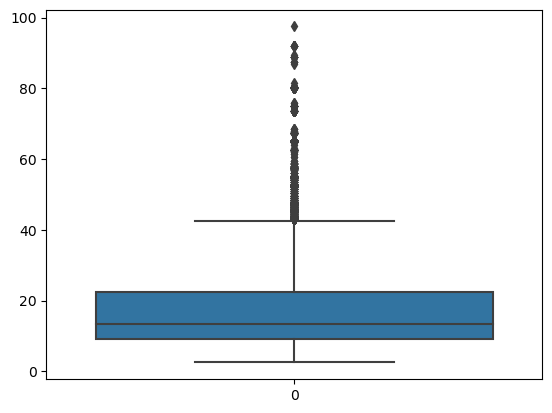

In [51]:
sb.boxplot(data['price'])

Values above 43 are the outliers of our dataset. Checking the indexes and count of those observtions:



In [52]:
out = np.where(data['price']>43)
print(out[0])
print(np.count_nonzero(np.where(data['price']>43)))

[   645    646    706 ... 637813 637878 637917]
5357


Removing all the 5357 rows in that array, as if these outliers are included, error value will increase



In [54]:
data.drop(out[0], inplace = True)
data.shape

(632619, 17)

Checking for skewness across all features



distance
0.7791878507534234


C:\Users\supri\AppData\Local\Temp\ipykernel_6236\3113586321.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(data[col])


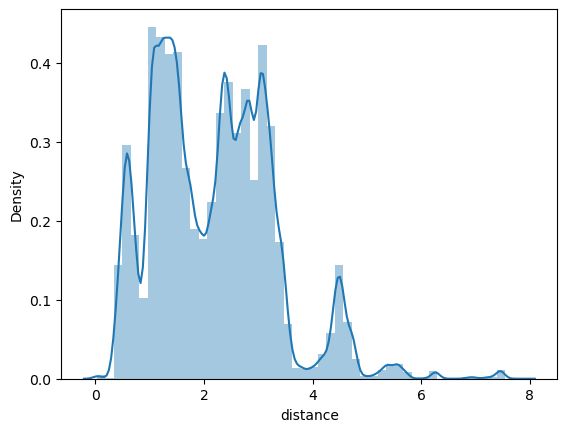

surge_multiplier
8.849268779215398


C:\Users\supri\AppData\Local\Temp\ipykernel_6236\3113586321.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(data[col])


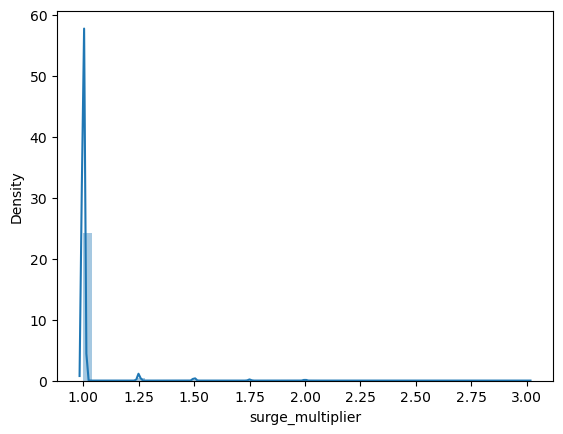

In [55]:
from scipy.stats import skew
cols = ['distance','surge_multiplier']
for col in cols:
    print(col)
    print(skew(data[col]))
    plt.figure()
    sb.distplot(data[col])
    plt.show()

<Axes: >

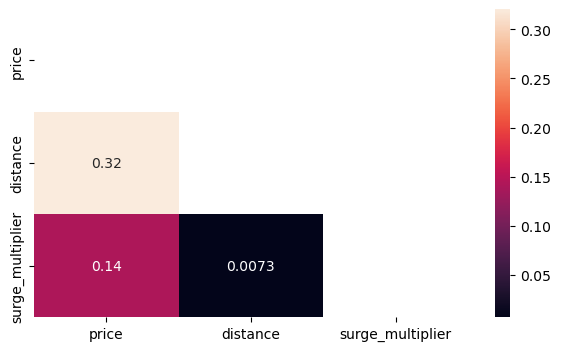

In [59]:
#plotting heatmap with correlation on data_new dataframe
cols = ['price','distance','surge_multiplier']
data_new = data[cols]

plt.figure(figsize=(7,4))
sb.heatmap(data_new.corr(),annot=True, mask=np.triu(data_new.corr()))

Surge multiplier has a very high skew value and less correlation with Price, whereas distance has decent correlation. So removing skewness from Surge multiplier alone using BoxCox transform

In [60]:
from scipy import stats

data['surge_multiplier'] = stats.boxcox(data['surge_multiplier'])[0]
pd.Series(data['surge_multiplier']).skew()

5.644449017653663

Skewness of Surge_multiplier reduced from 8.84 to 5.64
Splitting data for training and testing

In [61]:
from sklearn.model_selection import train_test_split
y = data['price'].values
X = data.drop(columns=['price'],axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

Performing linear regression on the trained data



In [64]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
model = lin_reg.fit(X_train,y_train)
y_pred=model.predict(X_test)

Checking R2 value for linear regression



In [65]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9300420917090527

Calucating the root mean sqaured error for linear regression



In [66]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred)
rootmeansq = np.sqrt(mse)
print(mse)
print(rootmeansq)

5.389008605040208
2.3214238314104145


# Solution for question 7

In [68]:
data2 = 'https://www.kaggle.com/datasets/insiyeah/musicfeatures'


In [69]:
import opendatasets as od

od.download(data2)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: supriyasingh1997
Your Kaggle Key: ········


100%|████████████████████████████████████████████████████████████████████████████████| 291k/291k [00:00<00:00, 549kB/s]

In [70]:
import os 
od.download(data2)

In [72]:
data_dir4 = '.\musicfeatures'  

In [73]:
os.listdir(data_dir4)  

['data.csv', 'data_2genre.csv']

In [75]:
data1 = pd.read_csv('data.csv')
data2 = pd.read_csv('data_2genre.csv')

In [77]:
data = pd.concat([data1,data2])

In [91]:
data.shape

(1200, 30)

In [92]:
data.tail()

,filename,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
1195,classical.00055.au,78.302557,40,0.186564,0.013056,1079.448981,1388.555898,1764.672663,0.059341,-484.028049,...,-10.565808,-7.789402,-2.957176,-0.261428,4.301272,5.296613,0.185797,-4.530118,-1.872410,classical
1196,classical.00095.au,86.132812,43,0.227545,0.013566,1800.707843,1780.942269,3426.854278,0.124357,-422.605491,...,5.887098,6.128175,8.144629,12.357588,7.093215,2.414364,0.784178,-3.421368,-0.746099,2
1197,rock.00082.au,99.384014,46,0.382454,0.093336,2975.976870,2423.245774,5926.697495,0.183736,-95.444482,...,13.879837,-12.619565,6.245220,-7.652916,7.402210,-9.409118,9.650029,-3.771893,1.067510,rock
1198,pop.00012.au,99.384014,48,0.385689,0.164214,2679.302938,2661.809854,5533.833204,0.125934,-50.834817,...,0.481314,-0.577153,-0.587280,-3.396011,-6.794488,-5.526936,-1.632317,-1.605600,-1.499167,1
1199,classical.00090.au,95.703125,45,0.215813,0.023866,2172.340941,1883.258566,4066.550410,0.151986,-326.280927,...,16.398617,3.505811,9.588159,5.921453,9.285932,9.968676,9.201811,2.801201,-5.379816,2


In [93]:
data['label'].value_counts()

metal        100
classical    100
rock         100
2            100
blues        100
disco        100
hiphop       100
pop          100
reggae       100
country      100
jazz         100
1            100
Name: label, dtype: int64

In [94]:
data.isnull().sum()

filename              0
tempo                 0
beats                 0
chroma_stft           0
rmse                  0
spectral_centroid     0
spectral_bandwidth    0
rolloff               0
zero_crossing_rate    0
mfcc1                 0
mfcc2                 0
mfcc3                 0
mfcc4                 0
mfcc5                 0
mfcc6                 0
mfcc7                 0
mfcc8                 0
mfcc9                 0
mfcc10                0
mfcc11                0
mfcc12                0
mfcc13                0
mfcc14                0
mfcc15                0
mfcc16                0
mfcc17                0
mfcc18                0
mfcc19                0
mfcc20                0
label                 0
dtype: int64

There is no null value present

In [95]:
data1 = data.copy()
data1 = data1.sample(frac=1).reset_index(drop=True)
data1

,filename,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,metal.00004.au,135.999178,67,0.634762,0.063475,3403.101905,2825.133742,6902.891592,0.192424,-107.103639,...,11.062812,-2.530152,7.580201,-4.197063,7.077187,-6.621545,4.543788,-4.262345,4.291028,metal
1,classical.00053.au,215.332031,95,0.304578,0.139884,1465.481886,1554.510617,2749.191709,0.087919,-119.290346,...,1.365431,-1.081142,-2.435241,-1.937585,1.298073,-1.381197,1.044973,-5.602966,-1.986243,2
2,rock.00087.au,129.199219,61,0.393010,0.165779,2334.723676,2208.278397,4819.854188,0.128581,-42.642600,...,11.755079,-11.573409,4.778181,-13.036836,4.350933,-11.956993,0.888441,-0.477468,1.299480,rock
3,pop.00055.au,103.359375,51,0.432740,0.240931,3940.227263,3361.583072,8259.358390,0.167399,-56.059513,...,4.860848,0.495568,2.511710,0.278645,-2.592301,-1.427635,-1.868152,-5.389616,-4.314299,1
4,hiphop.00029.au,123.046875,59,0.440483,0.166452,3131.126114,2854.494180,6395.411328,0.115686,-72.502204,...,5.992083,0.144926,4.966303,-2.010336,6.099787,0.095331,4.164399,0.246913,5.889322,hiphop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,classical.00011.au,151.999081,57,0.243056,0.021505,949.460832,1112.245413,1695.881412,0.060726,-385.246857,...,-0.934136,-3.658647,-2.104559,3.646540,0.722249,-1.226298,-0.747416,2.795865,1.554177,2
1196,metal.00071.au,86.132812,39,0.479849,0.115337,2807.988285,2407.516308,5674.107356,0.153805,-78.616550,...,15.585236,-9.705483,10.520632,-8.840398,6.216217,-4.766731,4.530720,-3.429310,3.165049,metal
1197,pop.00099.au,78.302557,38,0.360462,0.138195,2765.747194,3222.713605,6873.391771,0.096015,-119.320605,...,1.566938,-2.932391,-1.609138,-0.200545,-2.429376,1.207988,5.848729,1.609469,7.580263,pop
1198,classical.00062.au,89.102909,18,0.320225,0.038956,1474.803384,1813.316459,2809.941342,0.074046,-305.396503,...,-6.740364,-2.692870,-5.595527,-4.521924,-4.783026,-5.370309,-2.622151,-5.836810,-6.928835,2


In [96]:
data1['label'].value_counts()

metal        100
2            100
rock         100
1            100
hiphop       100
pop          100
disco        100
reggae       100
blues        100
classical    100
jazz         100
country      100
Name: label, dtype: int64

In [97]:
data1['label'].loc[data1['label'] == 1] = 'pop'
data1['label'].loc[data1['label'] == 2] = 'classical'
data1

C:\Users\supri\AppData\Local\Temp\ipykernel_6236\1061303375.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['label'].loc[data1['label'] == 1] = 'pop'
C:\Users\supri\AppData\Local\Temp\ipykernel_6236\1061303375.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['label'].loc[data1['label'] == 2] = 'classical'


,filename,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,metal.00004.au,135.999178,67,0.634762,0.063475,3403.101905,2825.133742,6902.891592,0.192424,-107.103639,...,11.062812,-2.530152,7.580201,-4.197063,7.077187,-6.621545,4.543788,-4.262345,4.291028,metal
1,classical.00053.au,215.332031,95,0.304578,0.139884,1465.481886,1554.510617,2749.191709,0.087919,-119.290346,...,1.365431,-1.081142,-2.435241,-1.937585,1.298073,-1.381197,1.044973,-5.602966,-1.986243,classical
2,rock.00087.au,129.199219,61,0.393010,0.165779,2334.723676,2208.278397,4819.854188,0.128581,-42.642600,...,11.755079,-11.573409,4.778181,-13.036836,4.350933,-11.956993,0.888441,-0.477468,1.299480,rock
3,pop.00055.au,103.359375,51,0.432740,0.240931,3940.227263,3361.583072,8259.358390,0.167399,-56.059513,...,4.860848,0.495568,2.511710,0.278645,-2.592301,-1.427635,-1.868152,-5.389616,-4.314299,pop
4,hiphop.00029.au,123.046875,59,0.440483,0.166452,3131.126114,2854.494180,6395.411328,0.115686,-72.502204,...,5.992083,0.144926,4.966303,-2.010336,6.099787,0.095331,4.164399,0.246913,5.889322,hiphop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,classical.00011.au,151.999081,57,0.243056,0.021505,949.460832,1112.245413,1695.881412,0.060726,-385.246857,...,-0.934136,-3.658647,-2.104559,3.646540,0.722249,-1.226298,-0.747416,2.795865,1.554177,classical
1196,metal.00071.au,86.132812,39,0.479849,0.115337,2807.988285,2407.516308,5674.107356,0.153805,-78.616550,...,15.585236,-9.705483,10.520632,-8.840398,6.216217,-4.766731,4.530720,-3.429310,3.165049,metal
1197,pop.00099.au,78.302557,38,0.360462,0.138195,2765.747194,3222.713605,6873.391771,0.096015,-119.320605,...,1.566938,-2.932391,-1.609138,-0.200545,-2.429376,1.207988,5.848729,1.609469,7.580263,pop
1198,classical.00062.au,89.102909,18,0.320225,0.038956,1474.803384,1813.316459,2809.941342,0.074046,-305.396503,...,-6.740364,-2.692870,-5.595527,-4.521924,-4.783026,-5.370309,-2.622151,-5.836810,-6.928835,classical


In [89]:
data1['label'].value_counts()

classical    200
pop          200
country      100
jazz         100
rock         100
metal        100
disco        100
hiphop       100
blues        100
reggae       100
Name: label, dtype: int64

In [98]:
print(data1['label'].unique())

['metal' 'classical' 'rock' 'pop' 'hiphop' 'disco' 'reggae' 'blues' 'jazz'
 'country']


In [99]:
data1.columns

Index(['filename', 'tempo', 'beats', 'chroma_stft', 'rmse',
       'spectral_centroid', 'spectral_bandwidth', 'rolloff',
       'zero_crossing_rate', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5',
       'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12',
       'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19',
       'mfcc20', 'label'],
      dtype='object')

In [100]:
col = ['mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5',
       'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12',
       'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19',
       'mfcc20']
X = data1[col]
y = data1['label']

In [101]:
from sklearn.model_selection import train_test_split

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=2)

In [103]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=10)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [104]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(acc)

0.58


In [105]:
y_pred2 = model.predict(data2[col])
y_pred2

array(['pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'jazz', 'pop', 'pop',
       'country', 'pop', 'pop', 'pop', 'pop', 'reggae', 'pop', 'pop',
       'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'disco', 'country',
       'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop',
       'pop', 'country', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop',
       'pop', 'pop', 'pop', 'pop', 'blues', 'jazz', 'pop', 'jazz', 'pop',
       'pop', 'pop', 'pop', 'pop', 'reggae', 'pop', 'pop', 'pop', 'pop',
       'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop',
       'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop',
       'reggae', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop',
       'pop', 'pop', 'pop', 'country', 'pop', 'pop', 'pop', 'disco',
       'pop', 'pop', 'pop', 'pop', 'rock', 'classical', 'classical',
       'classical', 'classical', 'classical', 'classical', 'classical',
       'classical', 'classical', 'classical', 'classical', 'classical',
    

In [106]:
print("Accuracy of Prediction is", accuracy_score(y_pred2, data2['label']))


Accuracy of Prediction is 0.0


# Solution for question 6

https://www.kaggle.com/datasets/ninzaami/loan-predication

In [88]:
data_ln = 'https://www.kaggle.com/datasets/ninzaami/loan-predication'

In [ ]:
 import opendatasets as od

In [89]:
od.download(data_ln)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: supriyasingh1997
Your Kaggle Key: ········


100%|██████████████████████████████████████████████████████████████████████████████| 7.83k/7.83k [00:00<00:00, 513kB/s]

In [90]:
import os

In [93]:
 data_dir6 = '.\loan-predication'

In [94]:
os.listdir(data_dir6)

['train_u6lujuX_CVtuZ9i (1).csv']

In [96]:
d_ln = pd.read_csv('train_u6lujuX_CVtuZ9i (1).csv')

In [156]:
d_ln1 = d_ln.copy()
d_ln1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [157]:
d_ln1.shape

(614, 13)

In [158]:
d_ln1.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [159]:
# droping null and loan_id

d_ln1 = d_ln1.dropna()       
d_ln1 = d_ln1.drop(['Loan_ID'],axis=1)

In [160]:
d_ln1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             480 non-null    object 
 1   Married            480 non-null    object 
 2   Dependents         480 non-null    object 
 3   Education          480 non-null    object 
 4   Self_Employed      480 non-null    object 
 5   ApplicantIncome    480 non-null    int64  
 6   CoapplicantIncome  480 non-null    float64
 7   LoanAmount         480 non-null    float64
 8   Loan_Amount_Term   480 non-null    float64
 9   Credit_History     480 non-null    float64
 10  Property_Area      480 non-null    object 
 11  Loan_Status        480 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 48.8+ KB


In [161]:
#Label encoding --------Target

d_ln1.replace({'Loan_Status':{'N':0,'Y':1}},inplace=True)

In [162]:
d_ln1['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [163]:
d_ln1['Dependents'].replace('3+',4,inplace=True)

In [164]:
d_ln1['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

In [165]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [166]:
d_ln1['Education'].value_counts()

Graduate        383
Not Graduate     97
Name: Education, dtype: int64

Data Visualization

<Axes: xlabel='Education', ylabel='count'>

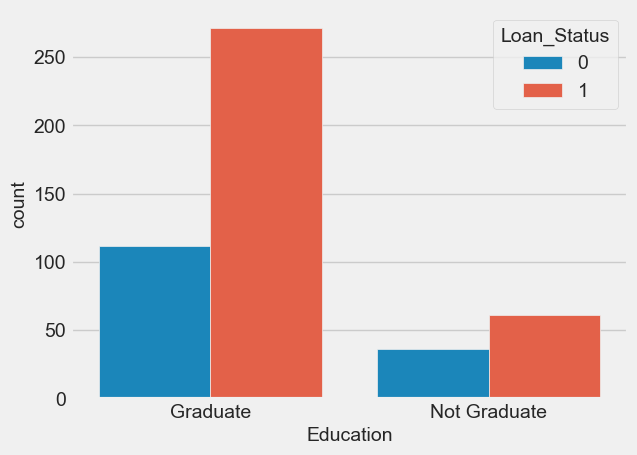

In [167]:
# education & Loan Status
sns.countplot(x = 'Education',hue='Loan_Status',data=d_ln1)


<Axes: xlabel='Married', ylabel='count'>

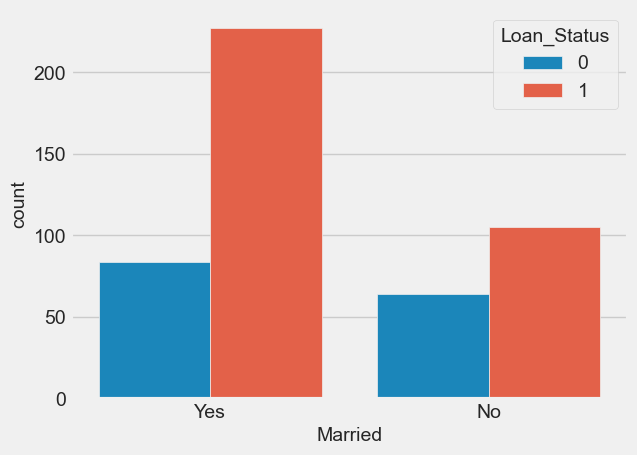

In [168]:
# marital status & Loan Staus
sns.countplot(x='Married',hue='Loan_Status',data=d_ln1)

In [169]:
# convert categorical columns to numerical values
d_ln1.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

In [170]:
d_ln1.tail()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,4,1,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,2,1
613,0,0,0,1,1,4583,0.0,133.0,360.0,0.0,1,0


In [171]:
x=d_ln1.iloc[:,:-1].values
y=d_ln1.iloc[:,-1].values

In [173]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.25,random_state=42,stratify=y)

Training model using SVM 

In [175]:
from sklearn import svm
classifier = svm.SVC(kernel='linear')
classifier.fit(x_train,y_train)

SVC(kernel='linear')

In [176]:
from sklearn.metrics import accuracy_score
ypred_train=classifier.predict(x_train)
train_accuracy=accuracy_score(ypred_train,y_train)
print('Accuracy on training data : ', train_accuracy)

Accuracy on training data :  0.7833333333333333


In [177]:
# accuracy score on training data
ypred_test=classifier.predict(x_test)
test_accuracy=accuracy_score(ypred_test,y_test)
print('Accurcy on test data : ',test_accuracy)

Accurcy on test data :  0.7222222222222222


# Solution for Advance question 3

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import hvplot.pandas
from scipy import stats
import sklearn 
%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm


In [5]:
data_new = 'https://www.kaggle.com/datasets/ashydv/advertising-dataset'

In [6]:
 import opendatasets as od

In [8]:
od.download(data_new)   

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: supriyasingh1997
Your Kaggle Key: ········


100%|█████████████████████████████████████████████████████████████████████████████████████| 1.83k/1.83k [00:00<?, ?B/s]

In [12]:
import os

In [17]:
 data_dir5 = '.\\advertising-dataset'

In [18]:
os.listdir(data_dir5)  

['advertising.csv']

In [21]:
data_new1 = pd.read_csv('advertising.csv')

In [33]:
data_new2 = data_new1.copy()
data_new2

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [24]:
data_new2.shape

(200, 4)

In [31]:
data_new2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [32]:
data_new2.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

There is no null data

In [34]:
data_new2.duplicated().any()

False

There is no duplicate data

How to find outlier if nay in data

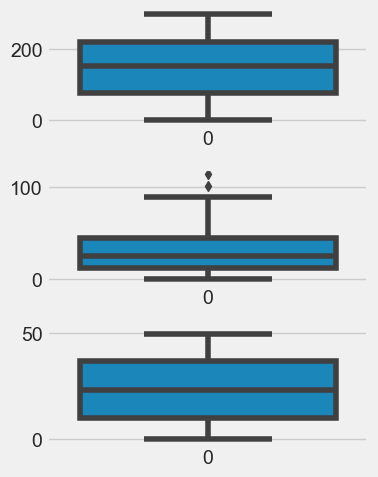

In [36]:
fig, axs = plt.subplots(3, figsize = (4,5))
plt1 = sns.boxplot(data_new2['TV'], ax = axs[0])
plt2 = sns.boxplot(data_new2['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(data_new2['Radio'], ax = axs[2])
plt.tight_layout()

There are very few outlier that can be neglected

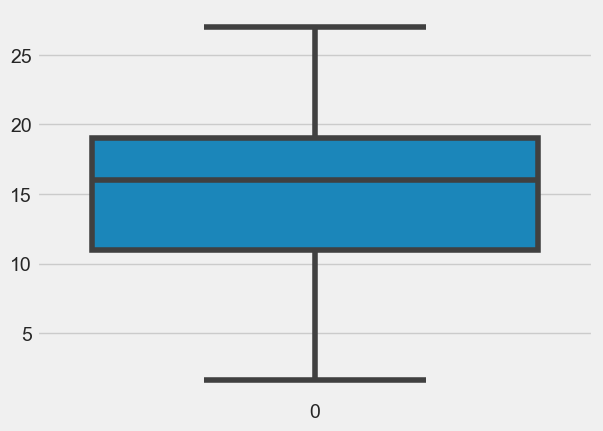

In [42]:
sns.boxplot(data_new2['Sales'])
plt.show()

Now to check distribution of dataset features

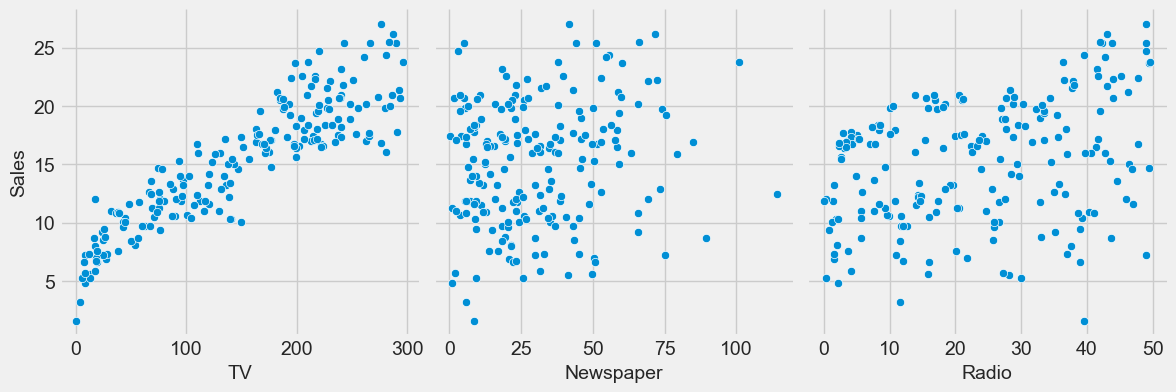

In [43]:
sns.pairplot(data_new2, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')

Observing the graph we can see TV is linearly scattered whereas Newspaper and Radio feature are randomly scattered

Now observing corelation of each feature with sales

<Axes: >

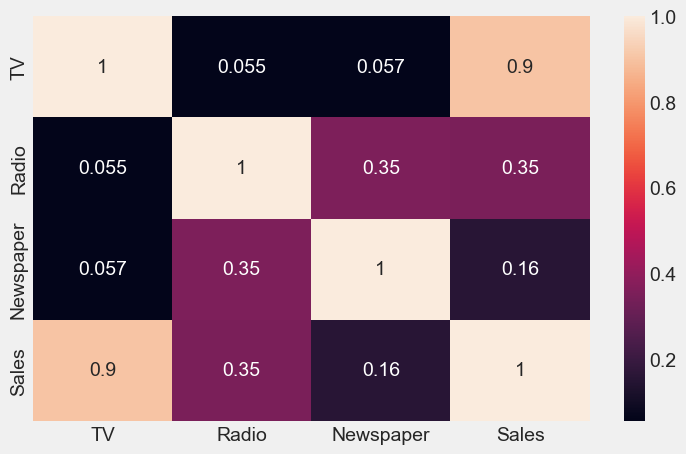

In [45]:
plt.figure(figsize=(8,5))
sns.heatmap(data_new2.corr(), annot = True)

We can observe Tv is highly corelated with value upto 0.9 when compared with Newspaper that is 0.16 and Radio 0.35

# Modeling

In [74]:
X = data_new2["TV"].array.reshape(-1, 1)
y = data_new2["Sales"]

In [75]:
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=5)
lr = LinearRegression()


In [77]:
X_train_sm = sm.add_constant(X_train)   #Account for the intercept term in a linear regression model
X_test_sm = sm.add_constant(X_test)

lr = sm.OLS(y_train,X_train_sm).fit()
y_pred = lr.predict(X_test_sm)


In [78]:
params = lr.params.to_dict()


In [79]:
params

{'const': 6.904021336853657, 'x1': 0.05627869363886799}

# Model Summary

In [81]:
lr.summary2()


<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.815   
Dependent Variable: Sales            AIC:                723.7139
Date:               2023-06-01 17:06 BIC:                729.8642
No. Observations:   160              Log-Likelihood:     -359.86 
Df Model:           1                F-statistic:        701.0   
Df Residuals:       158              Prob (F-statistic): 5.69e-60
R-squared:          0.816            Scale:              5.3277  
--------------------------------------------------------------------
         Coef.     Std.Err.       t       P>|t|     [0.025    0.975]
--------------------------------------------------------------------
const    6.9040      0.3551    19.4446    0.0000    6.2027    7.6053
x1       0.0563      0.0021    26.4758    0.0000    0.0521    0.0605
-----------------------------------------------------------------
Omnibus:               1.004        Durbin-Watson:          1.676
Prob(Omnibus):         0.605        Jarque-Bera (JB):       0.793
Skew:                  -0.170       Prob(JB):               0.673
Kurtosis:              3.059        Condition No.:          325  
=================================================================

"""

As per summary R-Squared value is 0.81 that is 81% of the sales can be explained by TV feature

Now To create best fit line using slope and intercept

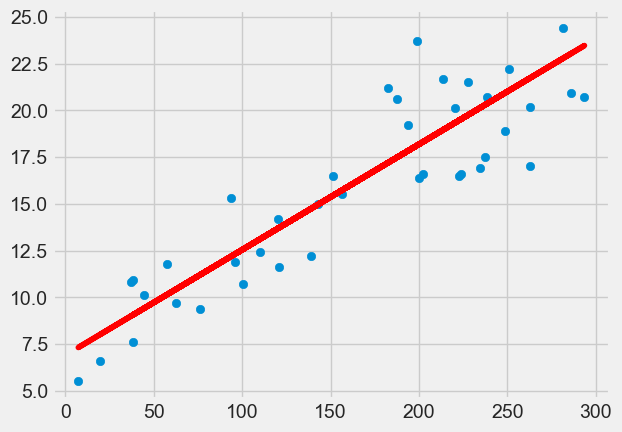

In [82]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.90402 + 0.0564*X_test, 'r')
plt.show()

In [83]:
# Checking some more imp observation

import sklearn.metrics as metrics
print('MAE: {}'.format(metrics.mean_absolute_error(y_test, y_pred)))
print('MSE: {}'.format(metrics.mean_squared_error(y_test, y_pred)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

MAE: 1.9177151355145035
MSE: 5.080675316512179
RMSE: 2.2540353405641578


C:\Users\supri\AppData\Local\Temp\ipykernel_10136\2497787731.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-y_pred))


<Axes: xlabel='Sales', ylabel='Density'>

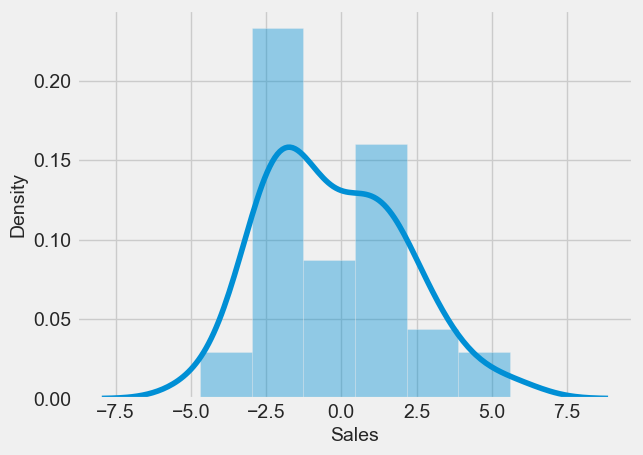

In [87]:
sns.distplot((y_test-y_pred))


Error is also quite normally distributed

# Solution for question 8

In [1]:
dq = 'https://www.kaggle.com/datasets/quora/question-pairs-dataset'

In [3]:
import opendatasets as od

In [4]:
od.download(dq)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: supriyasingh1997
Your Kaggle Key: ········


100%|█████████████████████████████████████████████████████████████████████████████| 20.8M/20.8M [00:07<00:00, 3.00MB/s]


In [6]:
import os

In [7]:
data_dir7 = '.\question-pairs-dataset'

In [10]:
os.listdir(data_dir7)  

['questions.csv']

In [13]:
dq1 = pd.read_csv('questions.csv')

In [16]:
dq2 = dq1.copy()
dq2

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
...,...,...,...,...,...,...
404346,404346,789792,789793,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404347,404347,789794,789795,Do you believe there is life after death?,Is it true that there is life after death?,1
404348,404348,789796,789797,What is one coin?,What's this coin?,0
404349,404349,789798,789799,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0


# Solution for Advance QUESTIONS 2

In [21]:
dl = 'https://www.kaggle.com/datasets/uciml/indian-liver-patient-records'

In [22]:
import opendatasets as od

In [23]:
od.download(dl)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: supriyasingh1997
Your Kaggle Key: ········


100%|██████████████████████████████████████████████████████████████████████████████| 7.68k/7.68k [00:00<00:00, 732kB/s]

In [30]:
import os

In [113]:
data_dir8 = '.\indian-liver-patient-records'

In [114]:
os.listdir(data_dir8)  

['.ipynb_checkpoints']

In [115]:
dl2 = pd.read_csv('indian_liver_patient.csv')

In [116]:
dl1 = dl2.copy()
dl1

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
warnings.filterwarnings('ignore')

In [118]:
dl1.shape

(583, 11)

In [119]:
dl1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [120]:
dl1.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

Only Albumin_and_Globulin_Ratio feature contains 4 missing value so replacing it with mean value of that feature

In [121]:
mean_ratio = dl1['Albumin_and_Globulin_Ratio'].mean()
mean_ratio

0.9470639032815197

In [122]:
dl1 = dl1.fillna(mean_ratio)
dl1

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [123]:
dl1.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

### Exploratory Data Analysis


Age distribution of the patients


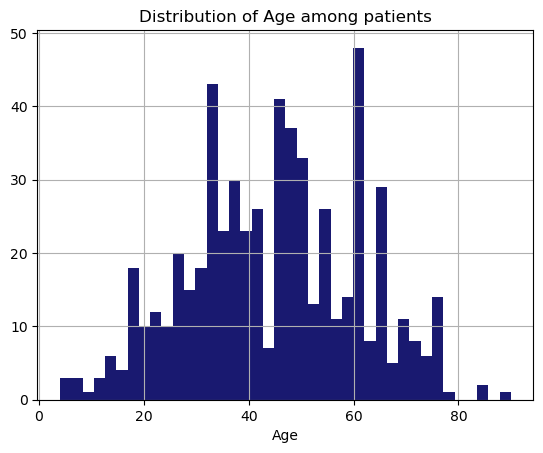

In [124]:
dl1['Age'].hist(bins=40, color='midnightblue')
plt.title("Distribution of Age among patients")
plt.xlabel("Age");

Distribution of Gender in patients in the dataset



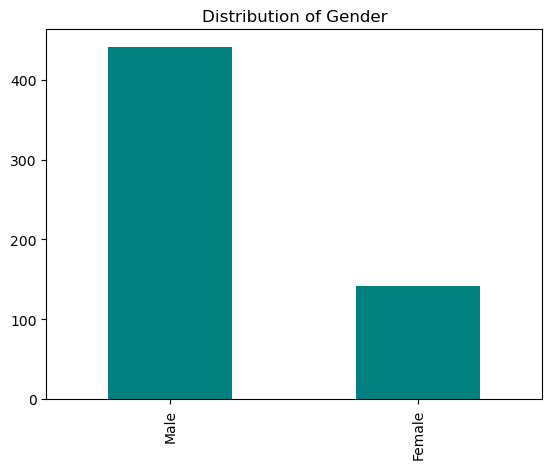

In [125]:
dl1['Gender'].value_counts().plot.bar(color='teal')
plt.title("Distribution of Gender");

Here  Number of males are more than the Number of females.

In [126]:
# changing the column name
dl1.rename(columns={'Dataset': 'Diagnosis', 'Total_Protiens': 'Total_Proteins'}, inplace=True)

# changing labels
dl1['Diagnosis'] = dl1['Diagnosis'].apply(lambda x:1 if x==1 else 0)

In [127]:
dl1

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,Diagnosis
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,0
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


Let us check the countplot of our Diagnosis column.


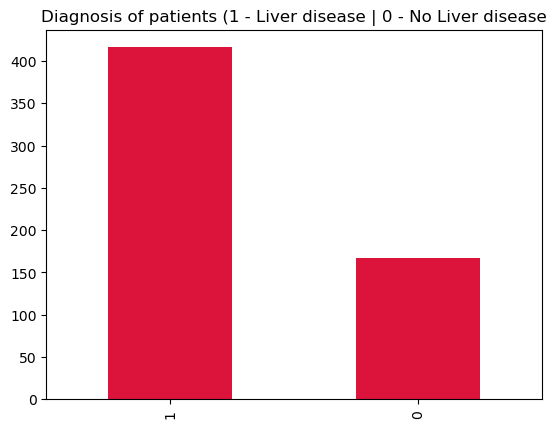

In [128]:
dl1['Diagnosis'].value_counts().plot.bar(color='crimson')
plt.title('Diagnosis of patients (1 - Liver disease | 0 - No Liver disease');

Our dataset contains more patients with a positive liver disease diagnosis than the ones with no disease.


##### The protein Intake for males and females are as follows.


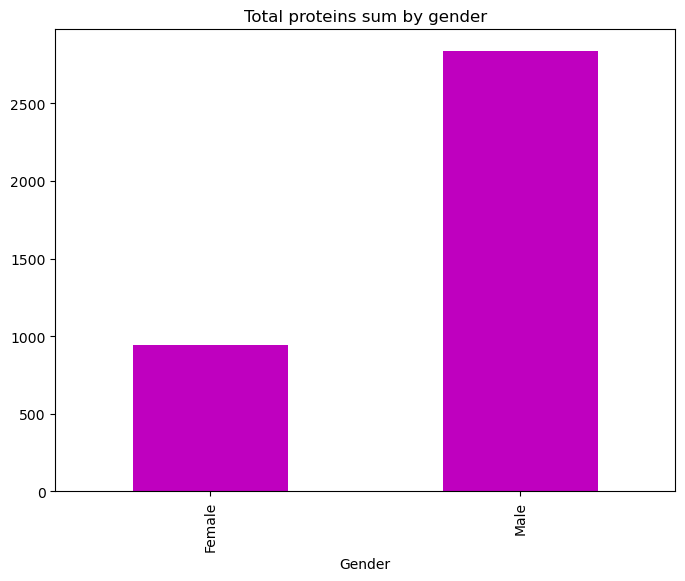

In [129]:
plt.figure(figsize=(8,6))
dl1.groupby('Gender').sum()["Total_Proteins"].plot.bar(color='m')
plt.title('Total proteins sum by gender');

The protein intake is higher in the case of Male and comparitively less in females.

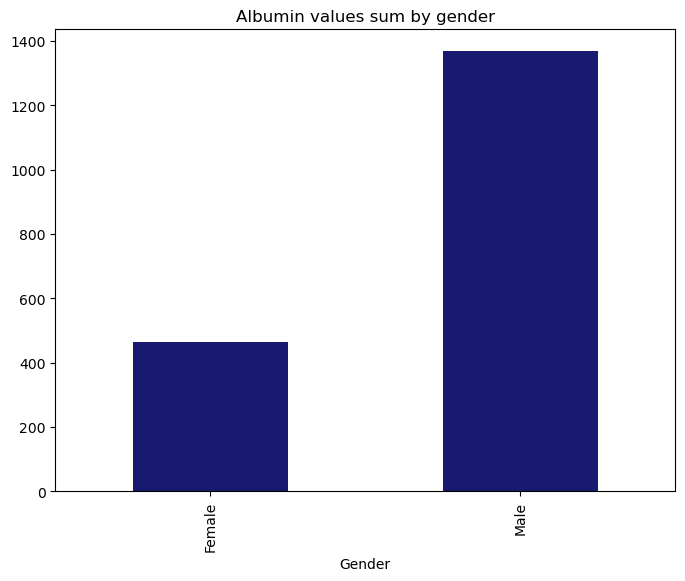

In [130]:
plt.figure(figsize=(8,6))
dl1.groupby('Gender').sum()['Albumin'].plot.bar(color='midnightblue')
plt.title('Albumin values sum by gender');

The Albumin Level is higher in the case of male as compared to female.

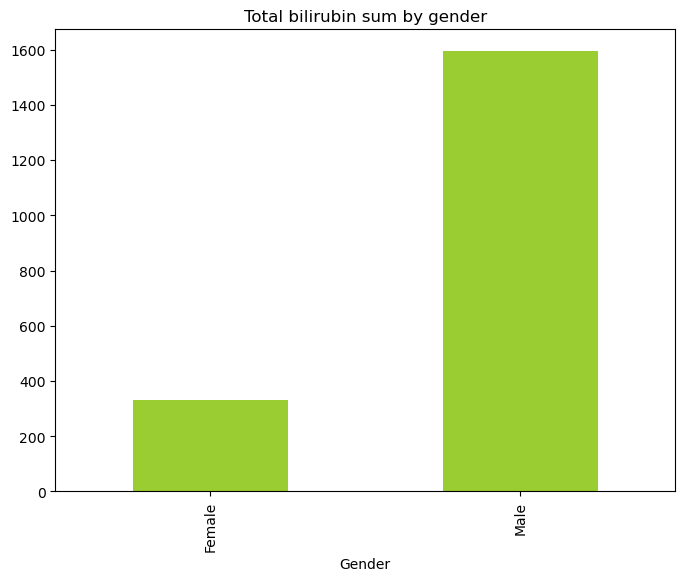

In [131]:
plt.figure(figsize=(8,6))
dl1.groupby('Gender').sum()['Total_Bilirubin'].plot.bar(color='yellowgreen')
plt.title('Total bilirubin sum by gender');

Higher the Bilirubin content, higher the case is prone to Liver disease. We can clearly see that males has more bilirubin content compared to female 

### Converting categorical column to binary numerical

In [132]:
dl1['Gender'] = dl1['Gender'].apply(lambda x:1 if x=='Male' else 0)

dl1.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,Diagnosis
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


To check the correlation between the features

In [133]:
corr=dl1.corr()

<Axes: >

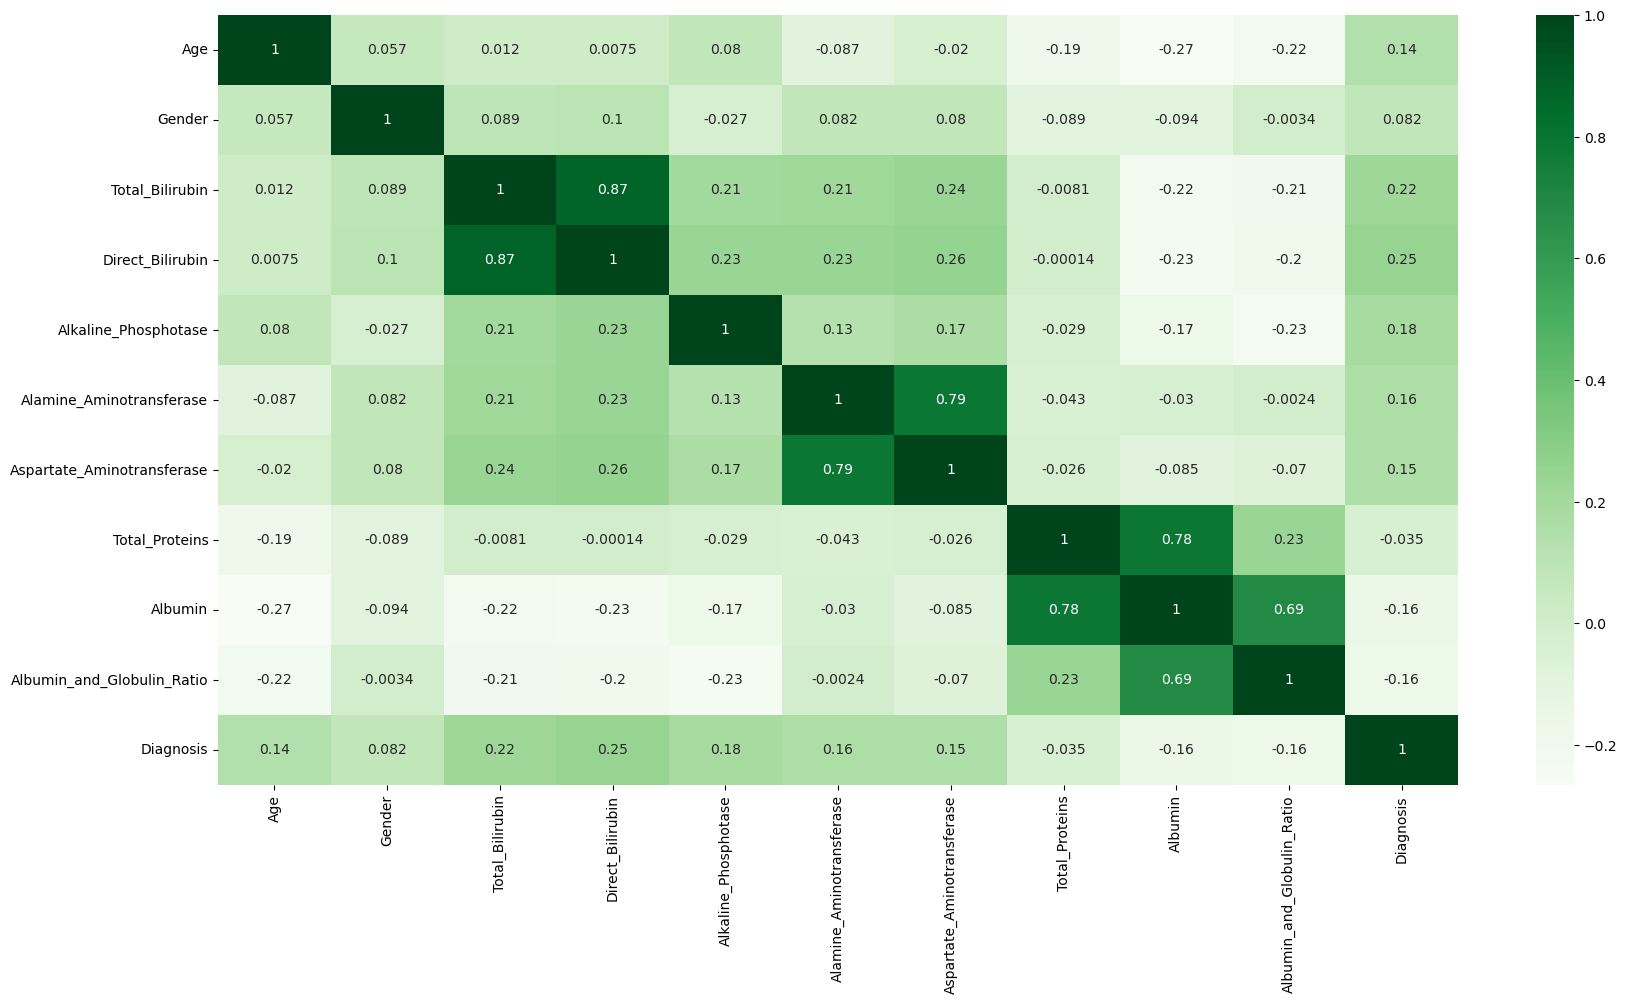

In [134]:
plt.figure(figsize=(20,10)) 
sns.heatmap(corr,cmap="Greens",annot=True)

In [135]:
dl1.drop("Diagnosis", axis=1).apply(lambda x: x.corr(dl1['Diagnosis']))

Age                           0.137351
Gender                        0.082416
Total_Bilirubin               0.220208
Direct_Bilirubin              0.246046
Alkaline_Phosphotase          0.184866
Alamine_Aminotransferase      0.163416
Aspartate_Aminotransferase    0.151934
Total_Proteins               -0.035008
Albumin                      -0.161388
Albumin_and_Globulin_Ratio   -0.162319
dtype: float64

In [136]:
dl1

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,Diagnosis
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,1,0.5,0.1,500,20,34,5.9,1.6,0.37,0
579,40,1,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,1,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,1,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [137]:
X = dl1.drop('Diagnosis', axis=1)
y = dl1['Diagnosis']

In [138]:
from sklearn.preprocessing import StandardScaler

# Scaling the feature columns
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

In [139]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=22)

### Model training using Logistic Regression Classifier

In [140]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [167]:
from sklearn.metrics import accuracy_score
y_pred = lr.predict(X_test)
accuracy_score(y_test, y_pred)

0.72

In [142]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.55      0.33      0.41        52
           1       0.76      0.89      0.82       123

    accuracy                           0.72       175
   macro avg       0.65      0.61      0.61       175
weighted avg       0.69      0.72      0.70       175



### Model Training using KNN Classifier

In [143]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)

neigh.fit(X_train, y_train)

y_pred = neigh.predict(X_test)
accuracy_score(y_test, y_pred)

0.6914285714285714

In [144]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.48      0.42      0.45        52
           1       0.77      0.80      0.79       123

    accuracy                           0.69       175
   macro avg       0.62      0.61      0.62       175
weighted avg       0.68      0.69      0.69       175



### Training a SVC Classifier

In [145]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')

svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
accuracy_score(y_test, y_pred)

0.7028571428571428

In [146]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        52
           1       0.70      1.00      0.83       123

    accuracy                           0.70       175
   macro avg       0.35      0.50      0.41       175
weighted avg       0.49      0.70      0.58       175



### Training a Random Forest Classifier

In [147]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.6971428571428572

In [168]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.55      0.33      0.41        52
           1       0.76      0.89      0.82       123

    accuracy                           0.72       175
   macro avg       0.65      0.61      0.61       175
weighted avg       0.69      0.72      0.70       175



## Using Logistic Regression Classifier givES us the highest accuracy.